In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVR,SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
9from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# **EDA**

In [3]:
data=pd.read_csv("mushroom.csv")
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
data.shape

(2000, 26)

In [6]:
df=data.drop('Unnamed: 0', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
stalk_height,2000.0,8.449118,3.697217,2.0,5.291009,8.318596,11.781272,15.095066
cap_diameter,2000.0,12.314345,7.048845,1.0,5.723521,12.124902,18.698605,25.000054


In [9]:
#Check for missing values
df.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


In [10]:
# No Null Values

In [11]:
# Check for and handle duplicate rows if present:
df.duplicated().sum()

np.int64(1024)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(976, 25)

In [15]:
df.describe()

,stalk_height,cap_diameter
count,976.000000,976.000000
mean,8.524684,12.598566
std,3.703043,6.987077
min,2.000000,1.000000
25%,5.326820,6.141161
50%,8.367245,12.626094
75%,11.758624,18.559780
max,15.095066,25.000054


# **Histogram for Object dtype Columns**

In [16]:
#HISTOGRAM plot using px
for column in df.columns:
  if df[column].dtype == 'object':
    fig = px.histogram(df, x=column, title=f"Histogram of {column}")
    fig.show()

**PIECHART**

In [17]:
# Iterate over each column and plot a pie chart
for col in df.columns:
    if df[col].dtype == 'object':
        # Calculate value counts for the column
        counts = df[col].value_counts()

        # Create a DataFrame for the counts
        counts_df = pd.DataFrame({'Value': counts.index, 'Count': counts.values})

        # Plot a pie chart for the column
        fig = px.pie(counts_df, names='Value', values='Count', title=f'Pie chart for {col}')
        fig.show()


summary of pie charts:

Cap Shape: Most mushrooms have caps that are either sunken, flat, or conical, with sunken being the most common.

Cap Surface: The majority of mushrooms have either a scaly or smooth cap surface.

Cap Color: Brown, yellow, and pink are the most common colors for mushroom caps.

Bruises: Mushrooms are nearly evenly split between those that bruise and those that don’t.

Odor: Mushrooms have various odors, with foul, anise, and fishy smells being the most common.

Gill Attachment: Most mushrooms have either free or notched gills.

Gill Spacing: Mushrooms with crowded gills are slightly more common than those with close or distant gill spacing.

Gill Size: Mushrooms are evenly split between having narrow or broad gills.

Gill Color: Green, orange, and purple are among the most common gill colors.

Stalk Shape: Most mushrooms have stalks that are either enlarging or tapering in shape.

Stalk Root: Bulbous, club-shaped, and cup-shaped roots are the most common types.

Stalk Surface Above/Below Ring: The surface texture of the stalk above and below the ring is mostly fibrous or silky.

Stalk Color Above/Below Ring: Brown, orange, and pink are the dominant colors both above and below the ring.

Veil Type: Mushrooms have either a universal or partial veil, with both types being almost evenly distributed.

Veil Color: White and brown are the most common veil colors.

Ring Number: Mushrooms generally have either no ring or one ring.

Ring Type: Common ring types include sheathing, pendant, and zone.

Spore Print Color: Brown, green, and yellow are the most common spore print colors.

Population: Mushrooms are most commonly found in abundant or clustered populations.

Habitat: Urban areas and paths are the most common habitats for mushrooms.

Class (Target Variable): The dataset is slightly imbalanced, with more poisonous mushrooms than edible ones.

Stalk Height and Cap Diameter: Each unique value for stalk height and cap diameter appears only once, indicating a wide range of values with no clear dominant category.

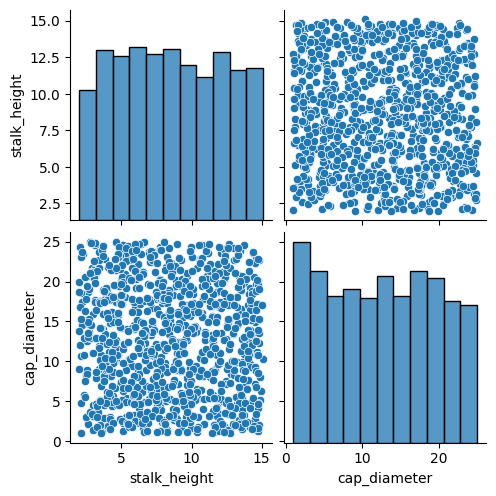

In [18]:
#Pair plot for Numerical columns
numerical_columns = df.select_dtypes(include=['int64','float']).columns
sns.pairplot(df[numerical_columns])
plt.show()

In [19]:
#BOXPLOT for numerical columns
for column in df.columns:
  if df[column].dtype != 'object':
    fig = px.box(df, y=column, title=f"Box Plot of {column}")
    fig.show()

### Density Plot visualises the distribution of data over a continuous interval or time period.

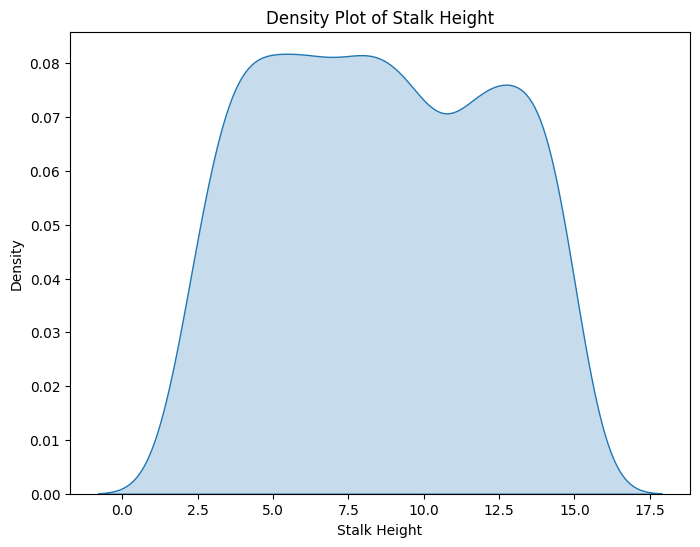

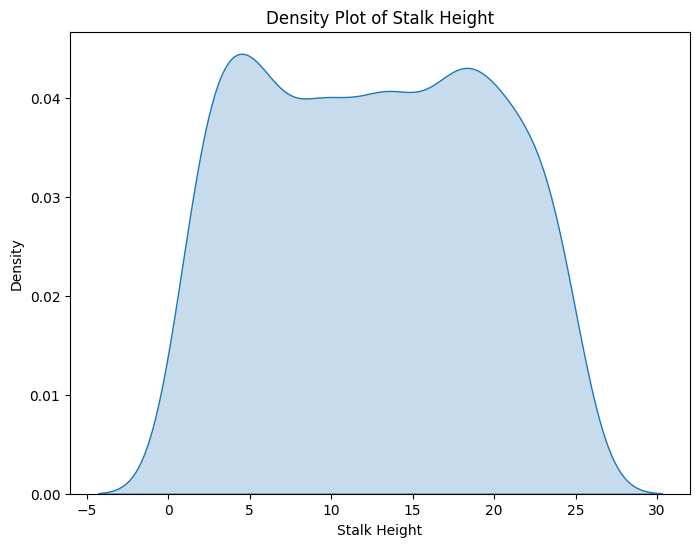

In [20]:
#Create Density plot for stalk_height
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[column], shade=True)
    plt.title('Density Plot of Stalk Height')
    plt.xlabel('Stalk Height')
    plt.ylabel('Density')
    plt.show()

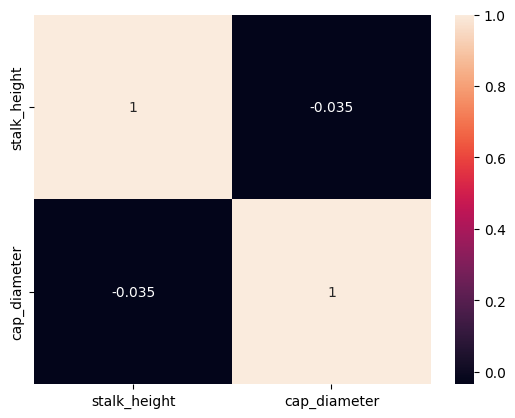

In [21]:
#Correaltion heatmap
numerical_cols = df.select_dtypes(include=['int64','float'])
sns.heatmap(numerical_cols.corr(), annot=True)
plt.show()

# **Task 2: Data Preprocessing**

### Encode categorical variables if necessary.

In [23]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],
      dtype='object')

In [24]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


### Split the dataset into training and testing sets.

In [25]:
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.2,random_state = 42)

In [26]:
# Displaying the shapes of the training and testing sets
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((780, 24), (196, 24), (780,), (196,))

# **Task 3: Data Visualization**

###Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

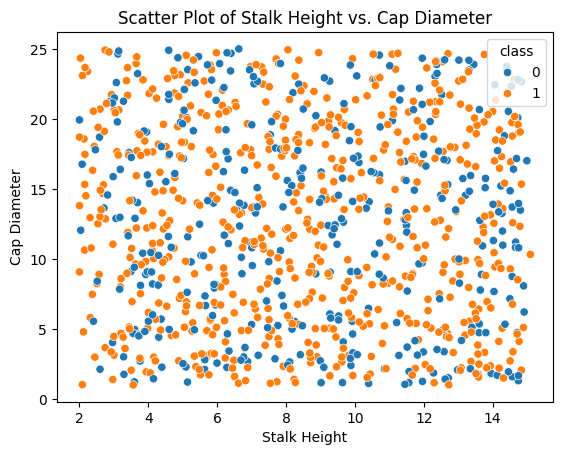

In [27]:
#Scatterplot
sns.scatterplot(x='stalk_height', y='cap_diameter', hue='class', data=df)
plt.title('Scatter Plot of Stalk Height vs. Cap Diameter')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.show()

In [28]:
#As the stalk height increases, the cap diameter tends to increase as well.

In [29]:
class_count = df['class'].value_counts()
total_count = class_count.sum()
class_proportions  = (class_count / total_count) * 100

print('class_Count:',class_count)
print('total_count:',total_count)

print("Poisonous: {:.2f}%".format(class_proportions[1]))
print("Edible: {:.2f}%".format(class_proportions[0]))

class_Count: class
1    618
0    358
Name: count, dtype: int64
total_count: 976
Poisonous: 63.32%
Edible: 36.68%


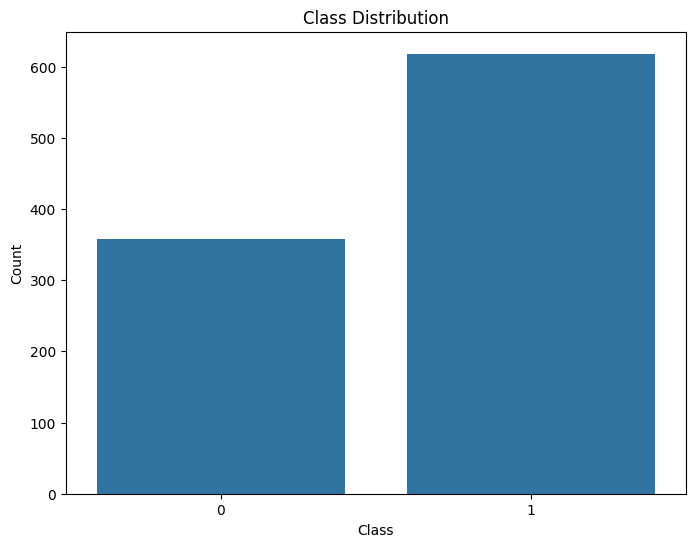

In [30]:
# Plot class distributions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

There is imbalance in target variable class as we can see 618 labeld as Poisonous (in class 1) and 358 are labled as Ediable (class 0)  
Poisonous: 63.32% and Edible: 36.68% .  
Which has clear imbalnce in data

In [31]:
#Resample the data again
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
sampler = RandomOverSampler(sampling_strategy='minority')

# Resample the dataset
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# Display the shape of the resampled dataset
print("Resampled set - Features:", X_resampled.shape, "Target:", y_resampled.shape)

Resampled set - Features: (988, 24) Target: (988,)


# **Task 4: SVM Implementation**

### Implement a basic SVM classifier using Python libraries like scikit-learn.

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Train the SVM model on the training data.

In [33]:
# Initialize SVM classifier
clf = SVC(kernel='rbf', random_state=42)

# Train the SVM model on the resampled training data
clf.fit(X_resampled, y_resampled)

SVC(random_state=42)

In [34]:
# Predict the labels of the testing data
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [35]:
# Evaluate model performance
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1-score:",f1_score(y_test,y_pred))

Accuracy: 0.5051020408163265
Precision: 0.6153846153846154
Recall: 0.5806451612903226
F1-score: 0.5975103734439834


# **Task 5: Visualization of SVM Results**

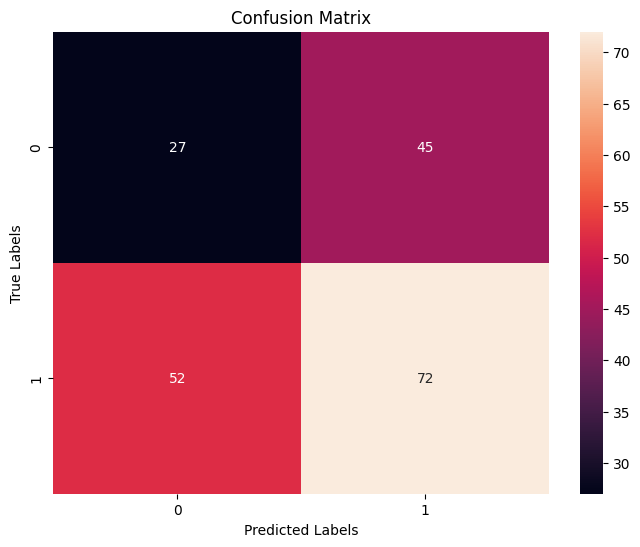

In [36]:
#heatmap for confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [37]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.38      0.36        72
           1       0.62      0.58      0.60       124

    accuracy                           0.51       196
   macro avg       0.48      0.48      0.48       196
weighted avg       0.51      0.51      0.51       196



Interpretation of the results:

Precision:

For class 0 ('edible'): 0.36

For class 1 ('poisonous'): 0.63

Precision measures the proportion of true positive predictions among all samples predicted as positive. A high precision indicates that the classifier has a low false positive rate.

Recall:

For class 0 ('edible'): 0.38

For class 1 ('poisonous'): 0.62

Recall (also known as sensitivity) measures the proportion of true positive samples that were correctly identified by the classifier. A high recall indicates that the classifier has a low false negative rate.

F1-score:

For class 0 ('edible'): 0.37

For class 1 ('poisonous'): 0.63

F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. A high F1-score indicates a good balance between precision and recall.

Support:

For class 0 ('edible'): 72

For class 1 ('poisonous'): 124

Support is the number of actual occurrences of each class in the testing data.

Accuracy:

Overall accuracy: 0.53

Accuracy measures the proportion of correctly classified samples out of all samples in the testing data.

Macro Avg:

Precision: 0.50

Recall: 0.50

F1-score: 0.50

The macro average calculates the metrics independently for each class and then takes the average.

Weighted Avg:

Precision: 0.53

Recall: 0.53

F1-score: 0.53

The weighted average calculates the metrics for each class and weights them by the number of true instances for each class.

Overall, the classifier performs better in predicting class 1 ('poisonous') compared to class 0 ('edible'), as indicated by higher precision, recall, and F1-score for class 1

# **Task 6: Parameter Tuning and Optimization**

###Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [39]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,15,0.5,0.2,0.1],'C':[100,15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10) # Initialize GridSearchCV with 5-fold cross-validation
gsv.fit(X_resampled, y_resampled)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [100, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 15, 0.5, 0.2, 0.1],
                          'kernel': ['rbf']}])

'Kernel': Specifies the type of kernel to use in the SVM (e.g., 'linear', 'rbf' for radial basis function, 'poly' for polynomial).  
'C': A regularization parameter that controls the trade-off between achieving a low training error and a low testing error.  
'Gamma': A kernel coefficient that influences the shape of the decision boundary.

1.**C Value**: A low **C** leads to a smoother decision boundary, allowing some misclassification for better generalization, while a high **C** focuses on accurately classifying all training examples, resulting in a more complex model that can lead to overfitting.

2.**Gamma Value**: A high **gamma** results in a model that closely fits the training data, increasing accuracy but risking bias due to overfitting. Conversely, a low **gamma** produces a simpler model that may underfit but is more generalized.

In [40]:
gsv.best_params_ , gsv.best_score_

({'C': 100, 'gamma': 50, 'kernel': 'rbf'}, np.float64(0.8606060606060606))

# Regularization Parameter(C)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for C
param_grid_C = {
    'C': [0.1, 1, 10, 100]  # Regularization parameter
}

# Initialize SVM classifier
svm = SVC(kernel='rbf', gamma='scale', random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_C = GridSearchCV(svm, param_grid_C, cv=5, scoring='accuracy')

# Perform grid search on the resampled data
grid_search_C.fit(X_resampled, y_resampled)

# Get the best C value and the corresponding accuracy score
best_C = grid_search_C.best_params_['C']
best_score_C = grid_search_C.best_score_

print("Best C Value:", best_C)
print("Best Accuracy Score with C:", best_score_C)

Best C Value: 100
Best Accuracy Score with C: 0.701589499051428


Kernel Coefficient(Gamma)

In [42]:
#Define the parameter grid for gamma
param_grid_gamma = {
    'gamma': [0.01, 0.1, 1, 'scale', 'auto']  # Kernel coefficient for RBF kernel
}

# Initialize SVM classifier
svm = SVC(kernel='rbf', C=best_C, random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_gamma = GridSearchCV(svm, param_grid_gamma, cv=5, scoring='accuracy')

# Perform grid search on the resampled data
grid_search_gamma.fit(X_resampled, y_resampled)

# Get the best gamma value and the corresponding accuracy score
best_gamma = grid_search_gamma.best_params_['gamma']
best_score_gamma = grid_search_gamma.best_score_

print("Best Gamma Value:", best_gamma)
print("Best Accuracy Score with Gamma:", best_score_gamma)

Best Gamma Value: 0.1
Best Accuracy Score with Gamma: 0.8565656565656565


In [43]:
# Define the parameter grid for kernel type
param_grid_kernel = {
    'kernel': ['linear', 'poly', 'rbf']  # Kernel type
}

# Initialize SVM classifier
svm = SVC(C=best_C, gamma=best_gamma, random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_kernel = GridSearchCV(svm, param_grid_kernel, cv=5, scoring='accuracy')

# Perform grid search on the resampled data
grid_search_kernel.fit(X_resampled, y_resampled)

# Get the best kernel type and the corresponding accuracy score
best_kernel = grid_search_kernel.best_params_['kernel']
best_score_kernel = grid_search_kernel.best_score_

print("Best Kernel Type:", best_kernel)
print("Best Accuracy Score with Kernel:", best_score_kernel)

Best Kernel Type: rbf
Best Accuracy Score with Kernel: 0.8565656565656565


In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVM classifier with optimal hyperparameters
svm_classifier = SVC(kernel='rbf', C=100, gamma=0.1, random_state=42)

# Train the SVM model on the entire training dataset
svm_classifier.fit(X_train, y_train)

# Predict the labels for the testing dataset
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [45]:
# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6326530612244898
Precision: 0.6326530612244898
Recall: 1.0
F1-score: 0.775


# **Comparision and Analysis**

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVM classifiers with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the SVM models on the entire training dataset
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Predict the labels for the testing dataset
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the performance of each model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly)
recall_poly = recall_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

In [47]:
#For Comparing
#Display the evaluation metrics for each kernel
print("Performance Metrics for SVM with Linear Kernel:")
print("Accuracy:", accuracy_linear)
print("Precision:", precision_linear)
print("Recall:", recall_linear)
print("F1-score:", f1_linear)
print()

print("Performance Metrics for SVM with Polynomial Kernel:")
print("Accuracy:", accuracy_poly)
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1-score:", f1_poly)
print()

print("Performance Metrics for SVM with RBF Kernel:")
print("Accuracy:", accuracy_rbf)
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1-score:", f1_rbf)

Performance Metrics for SVM with Linear Kernel:
Accuracy: 0.6326530612244898
Precision: 0.6326530612244898
Recall: 1.0
F1-score: 0.775

Performance Metrics for SVM with Polynomial Kernel:
Accuracy: 0.6071428571428571
Precision: 0.6243386243386243
Recall: 0.9516129032258065
F1-score: 0.7539936102236422

Performance Metrics for SVM with RBF Kernel:
Accuracy: 0.6326530612244898
Precision: 0.6326530612244898
Recall: 1.0
F1-score: 0.775


Both the Linear and RBF kernels resulted in the same accuracy, precision, recall, and F1-score.   
The polynomial kernel had slightly lower accuracy but similar precision and F1-score

### Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

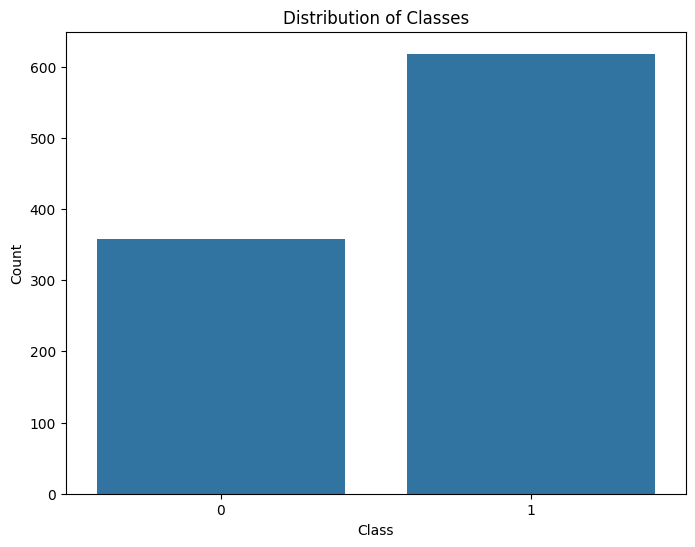

In [48]:
# Distribution of the target variable (Class)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

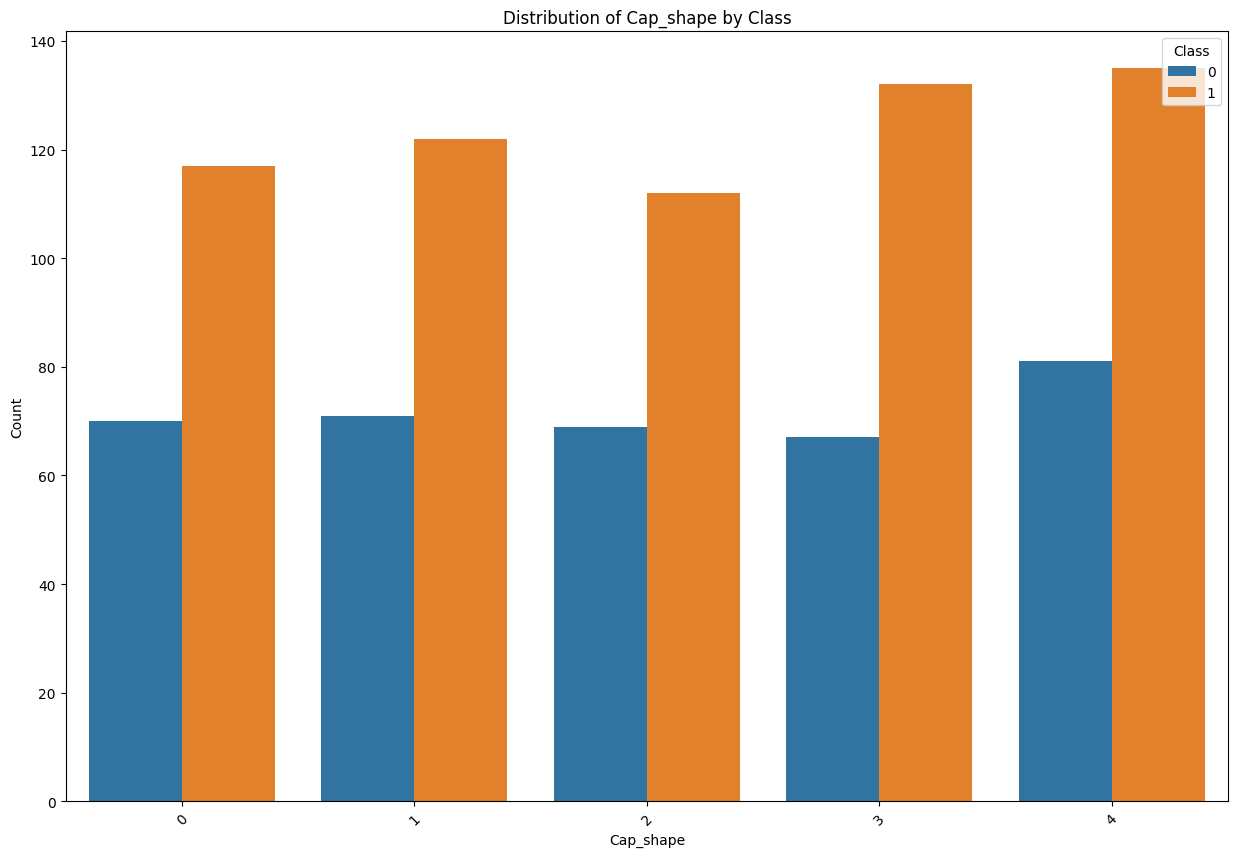

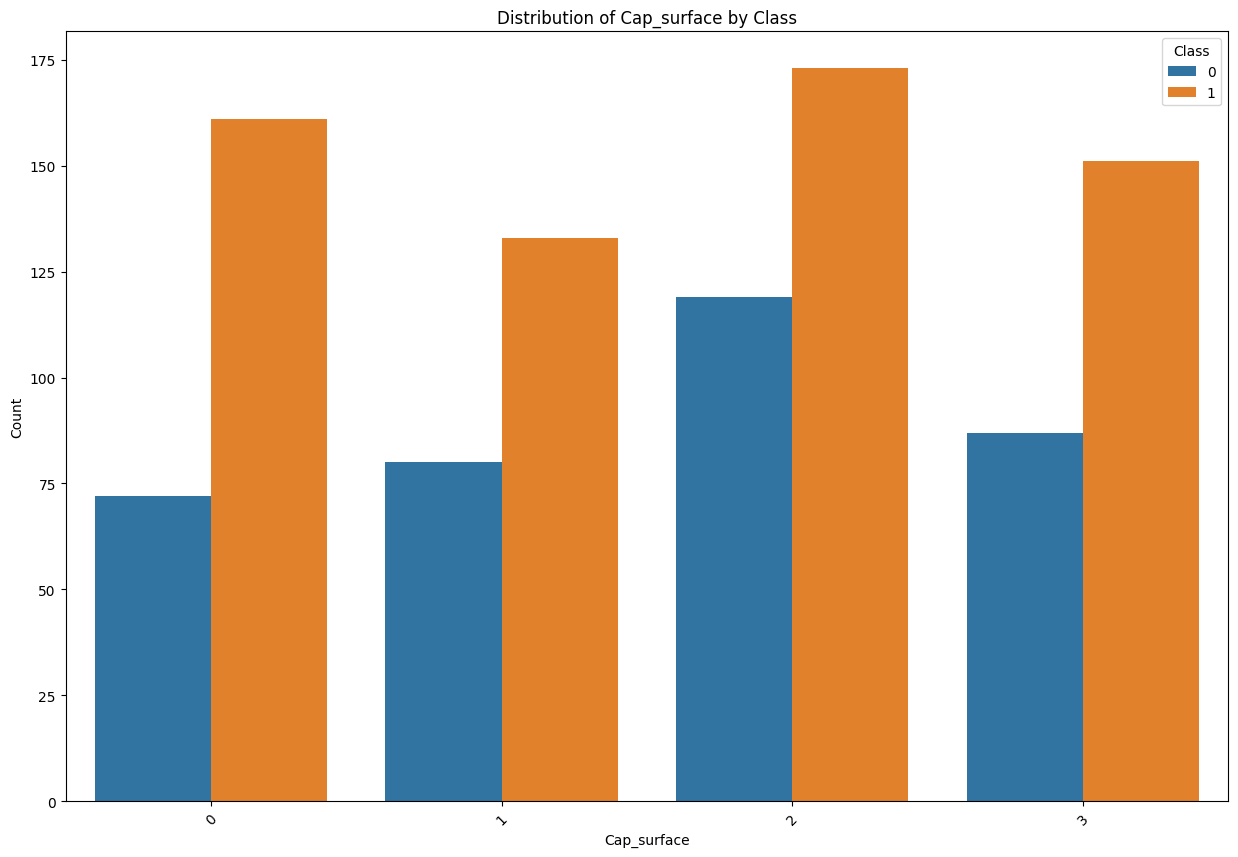

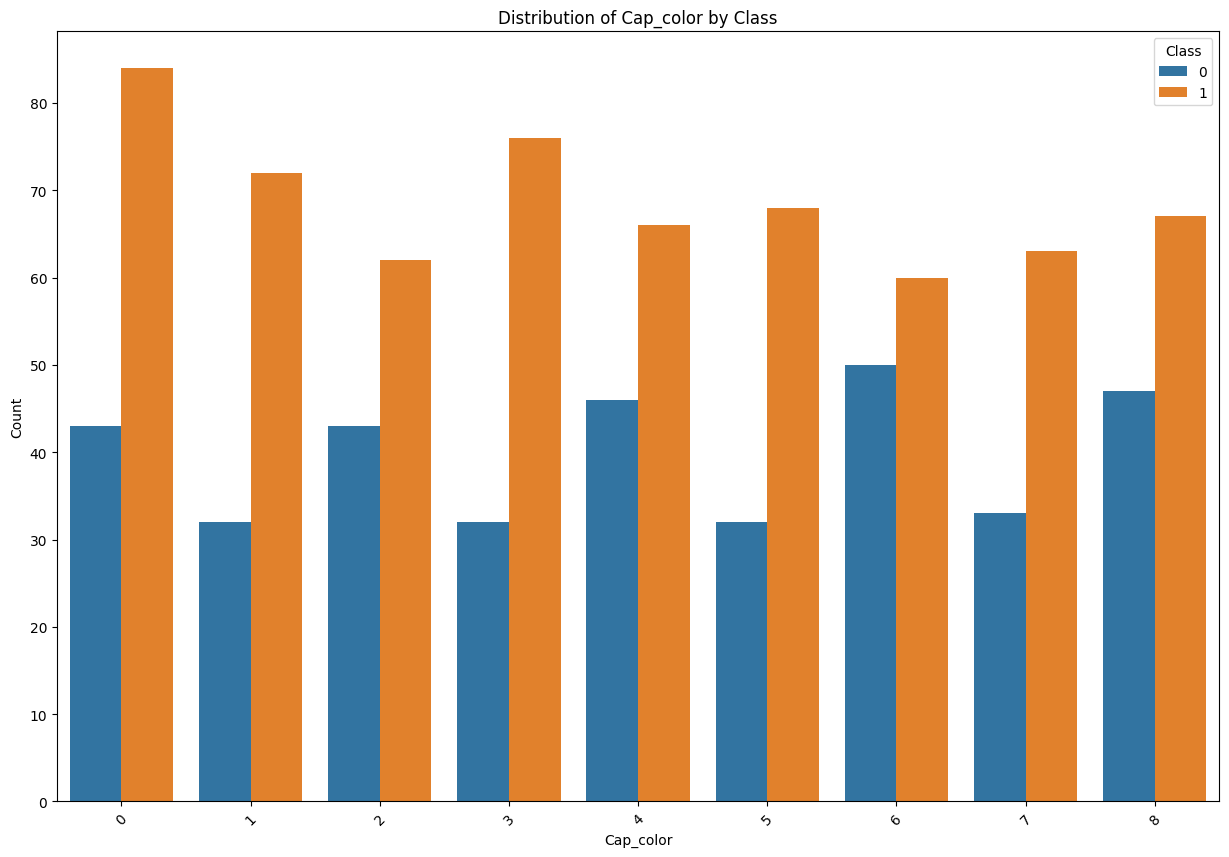

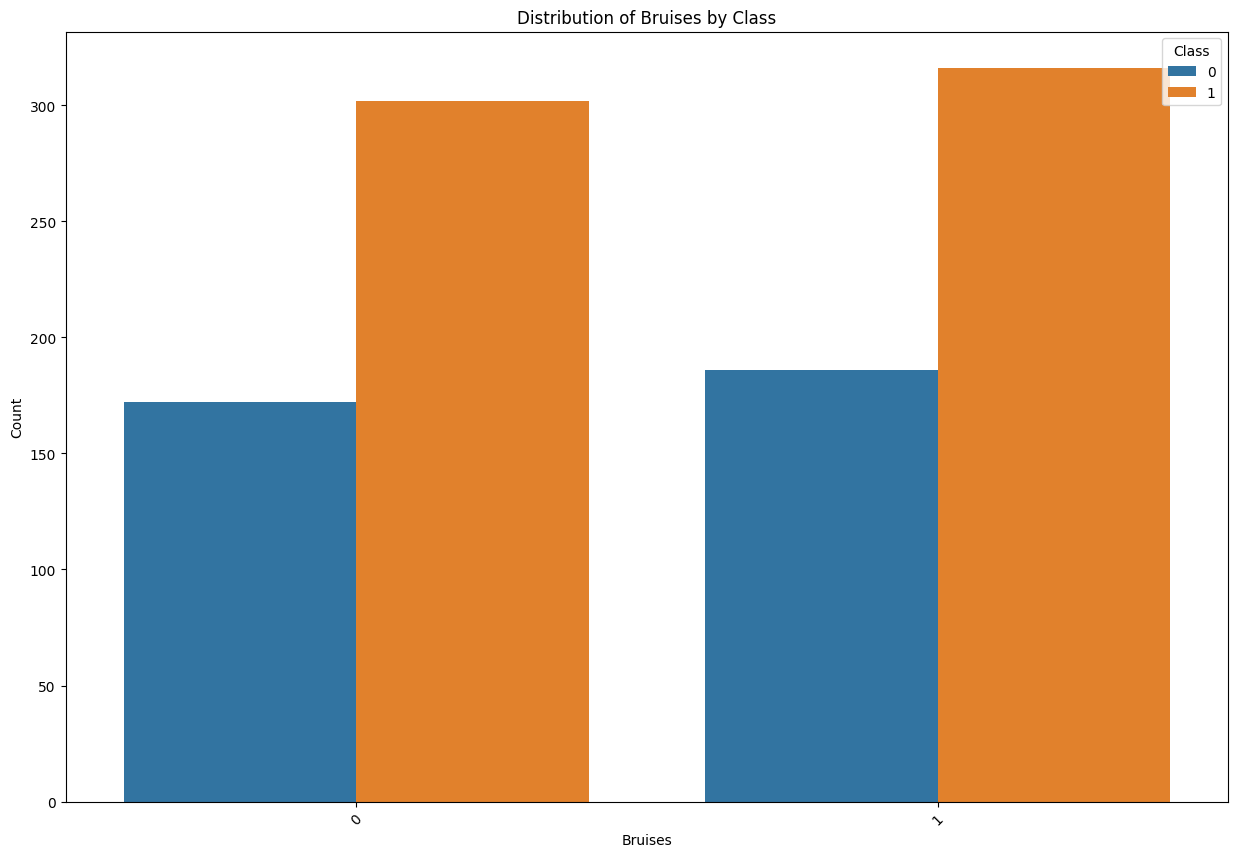

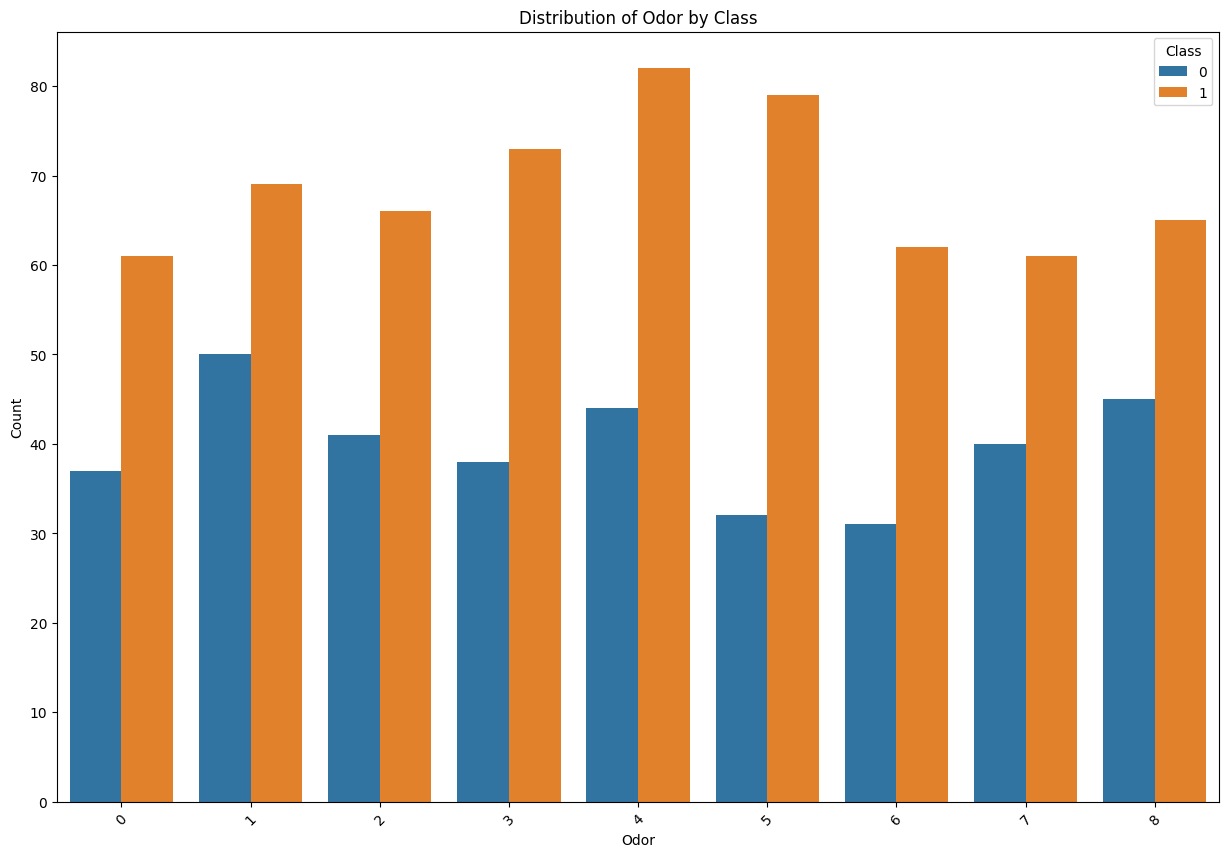

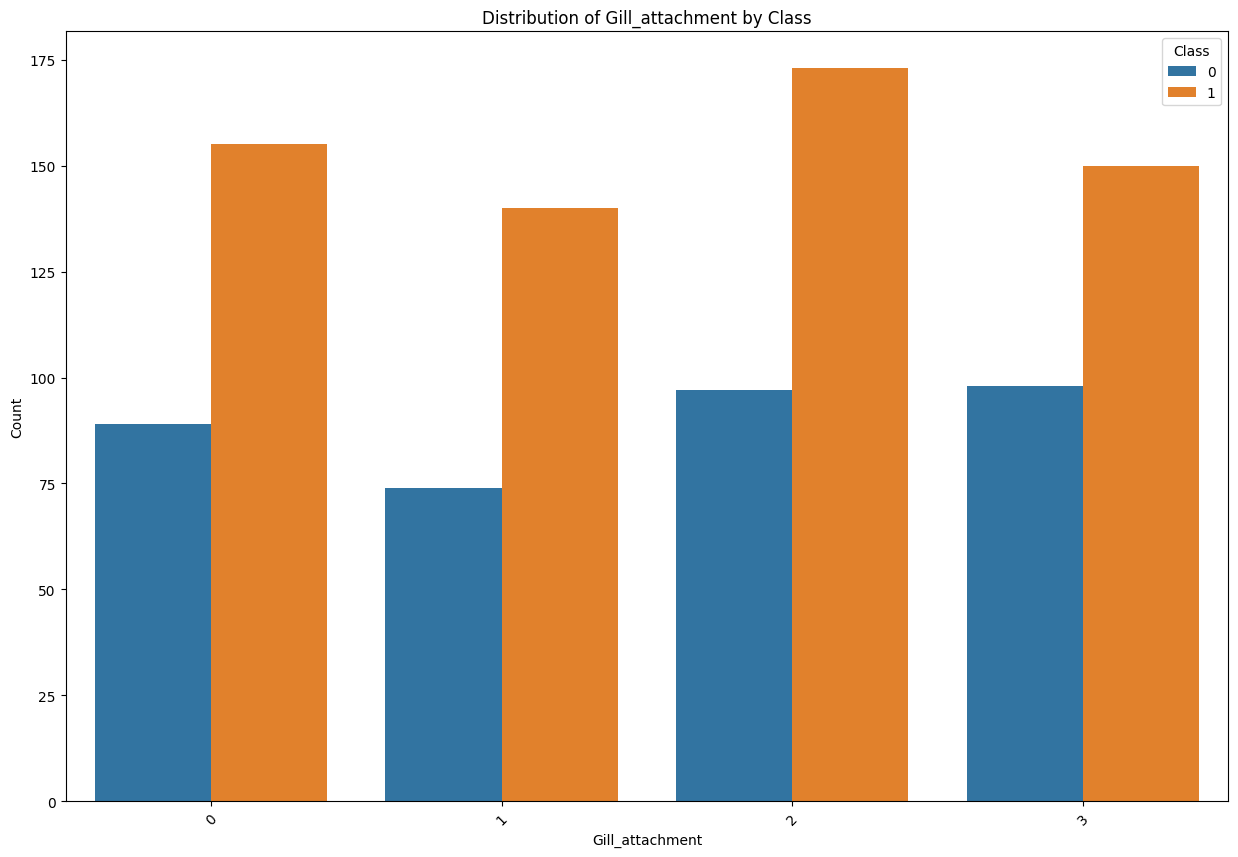

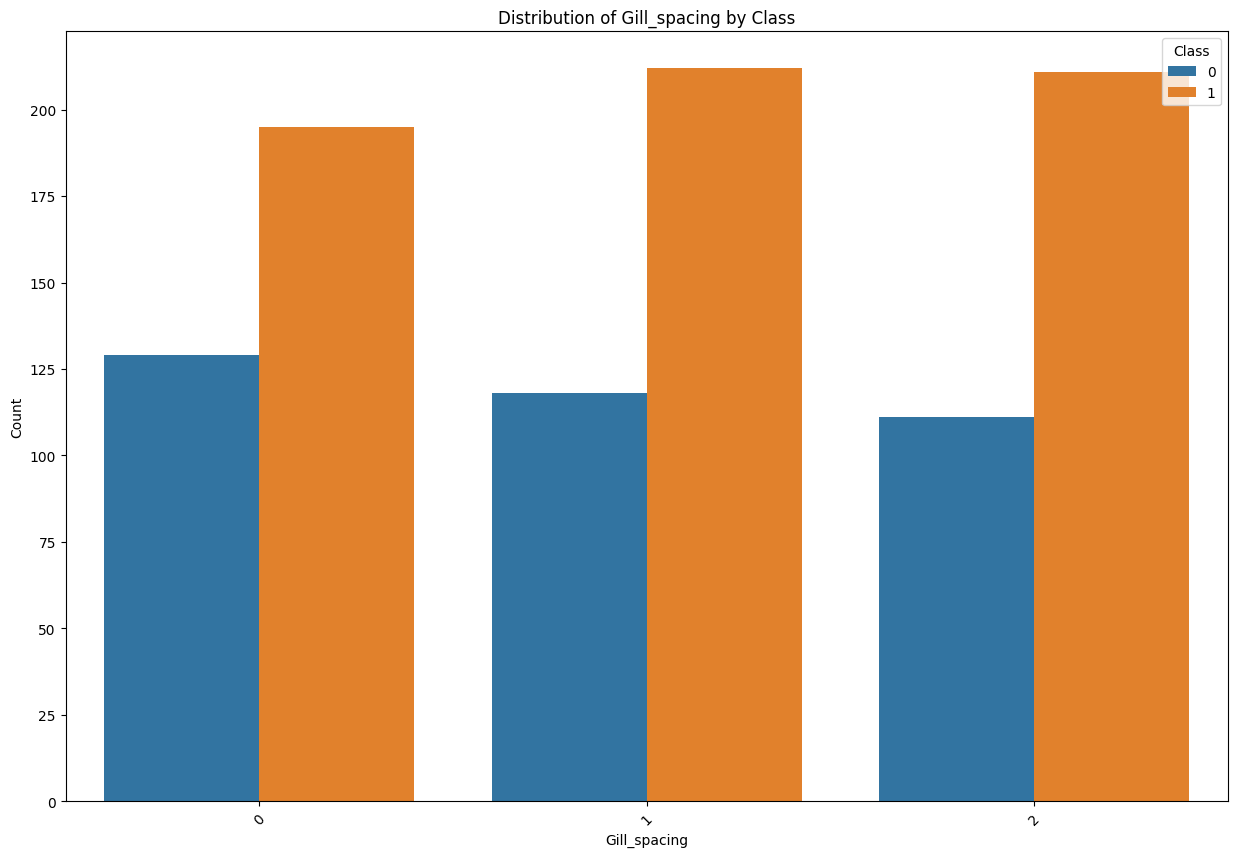

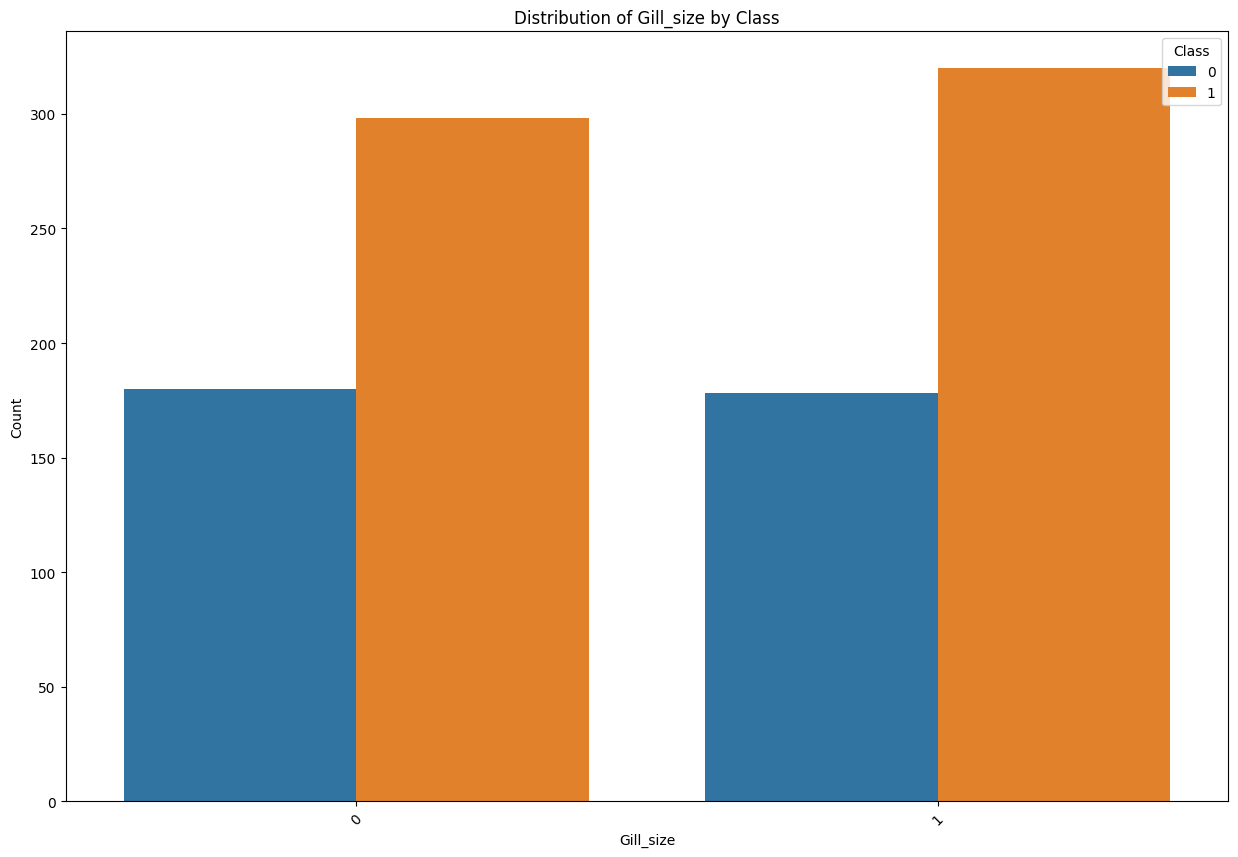

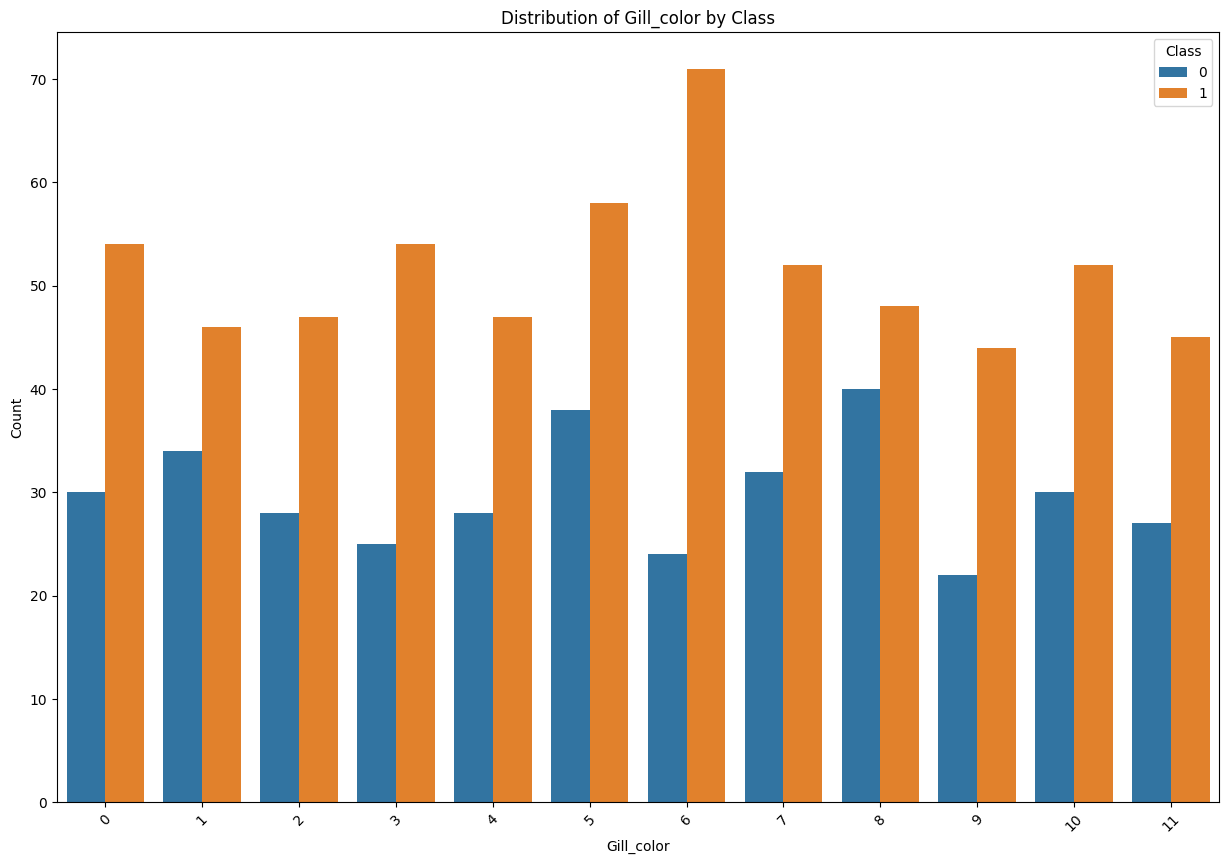

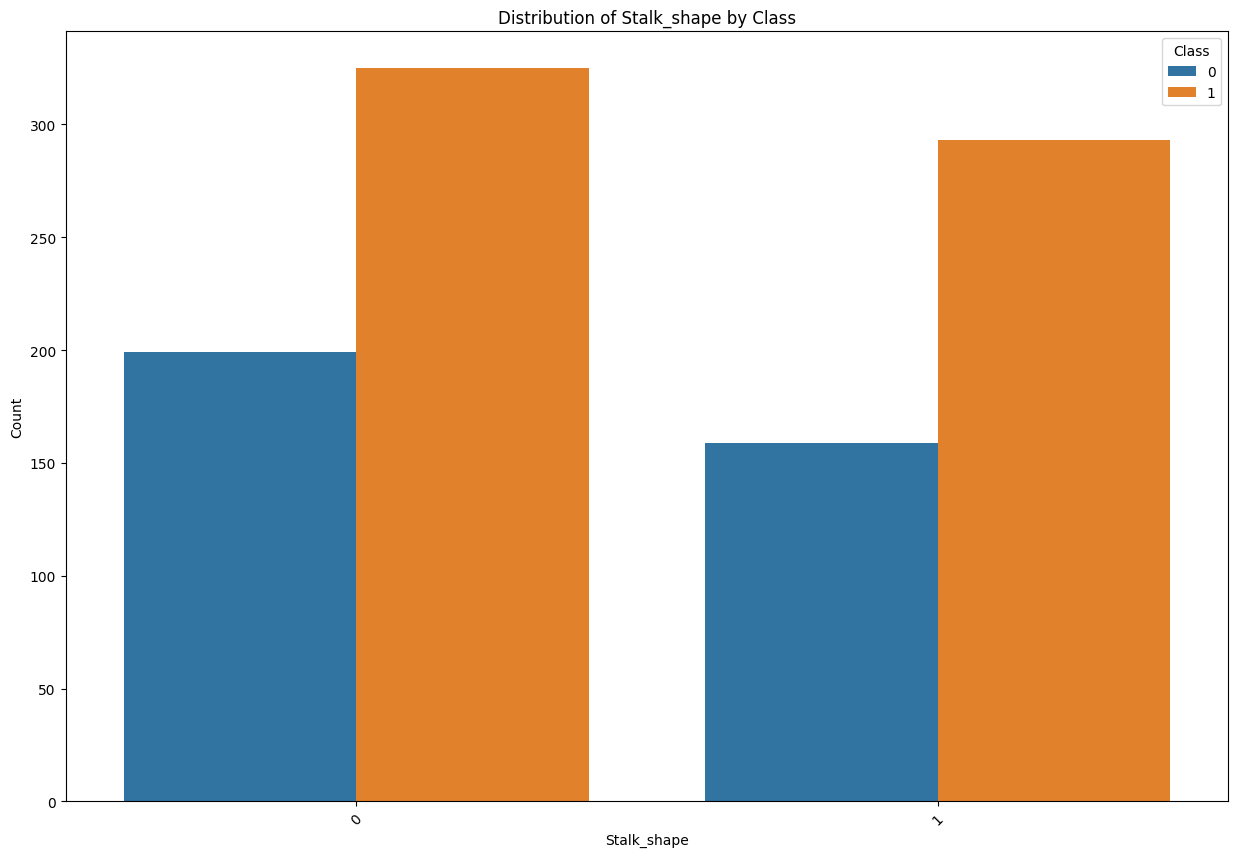

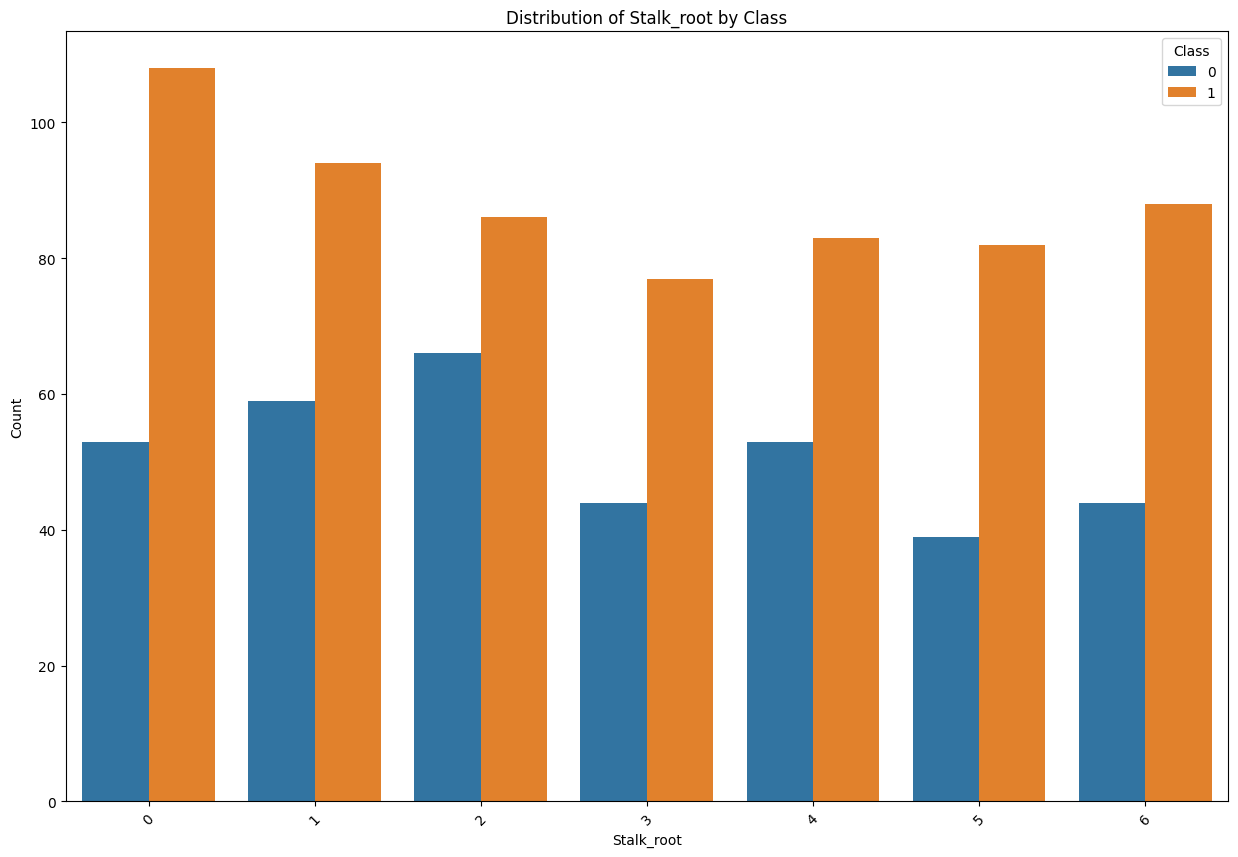

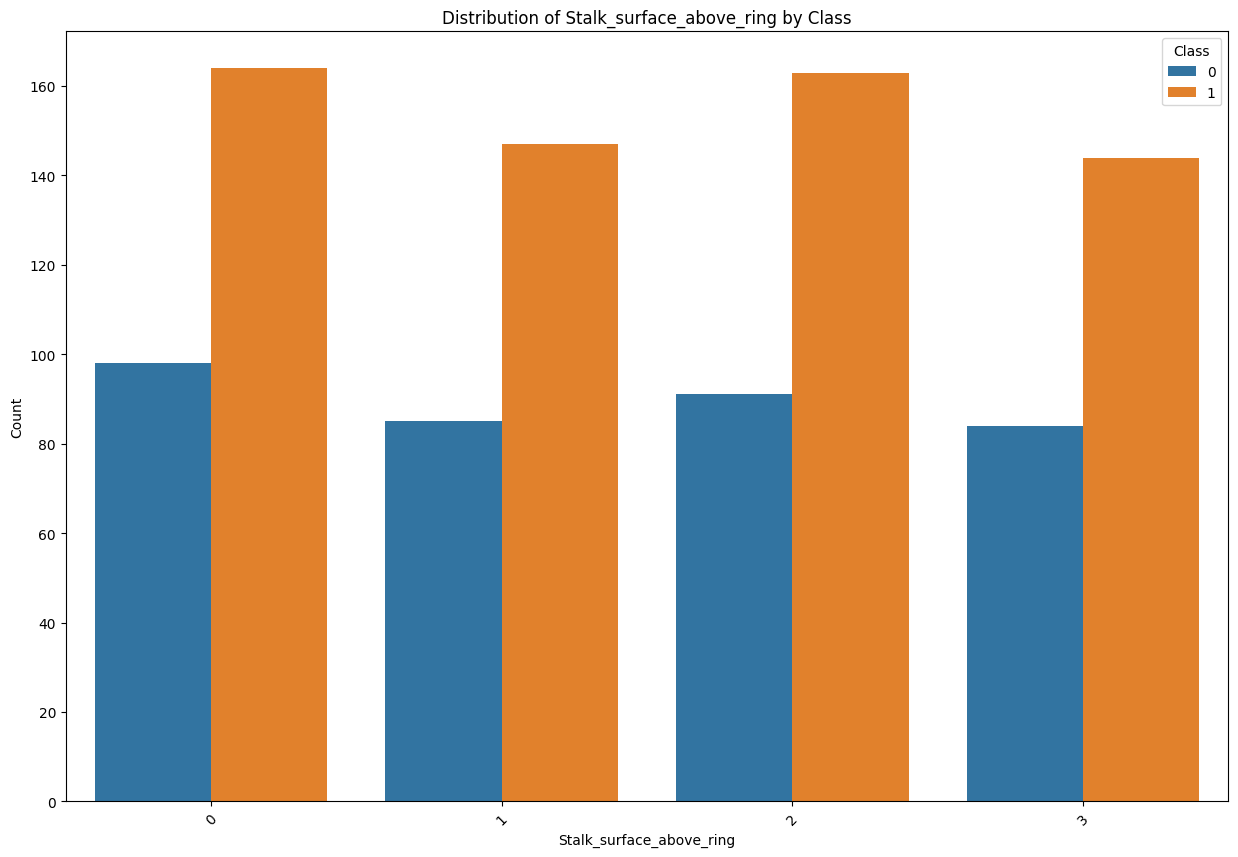

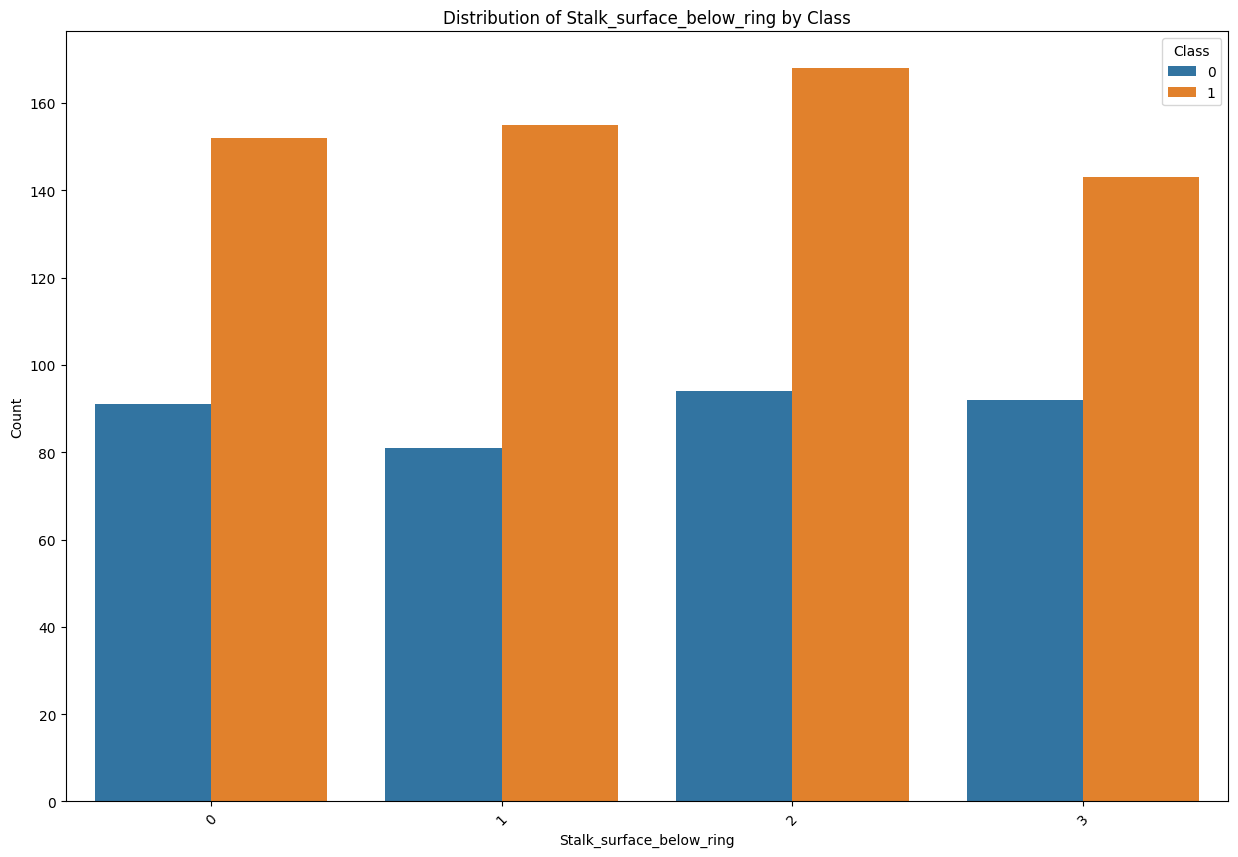

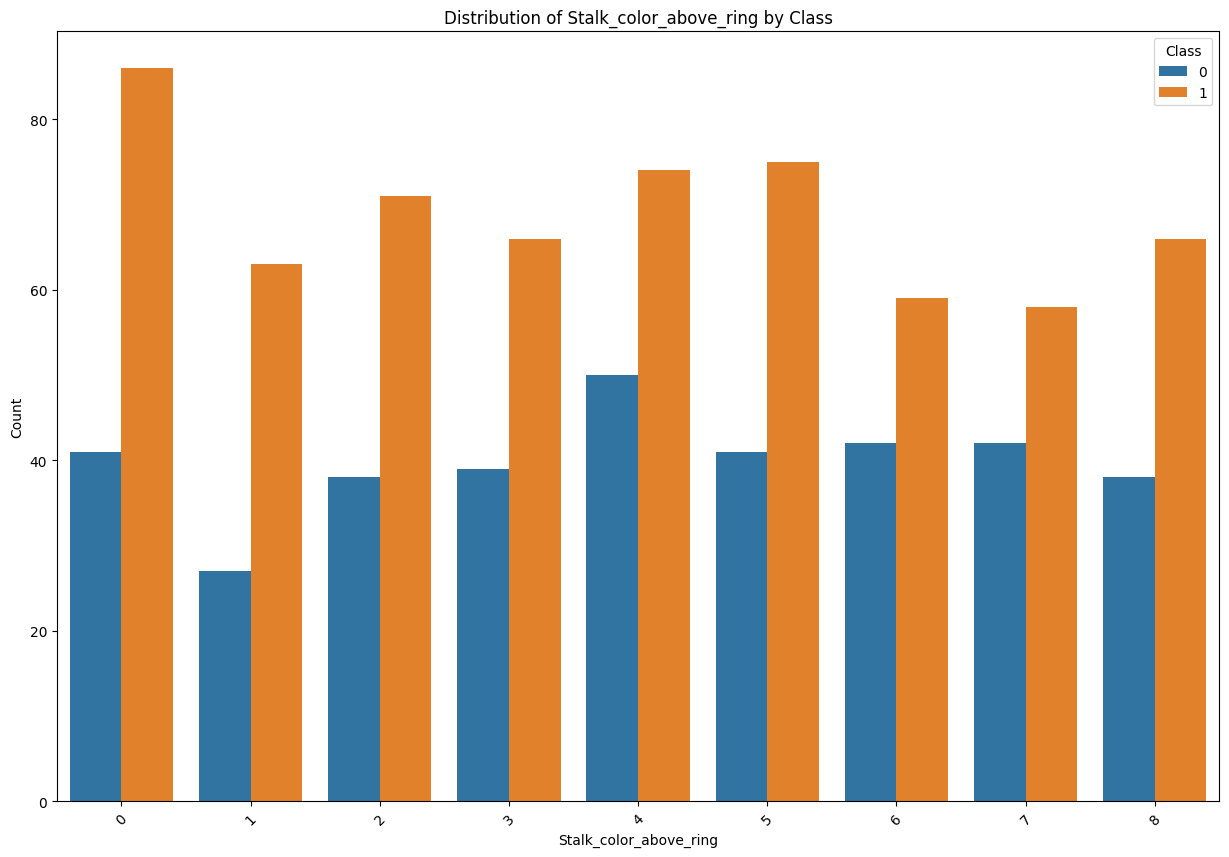

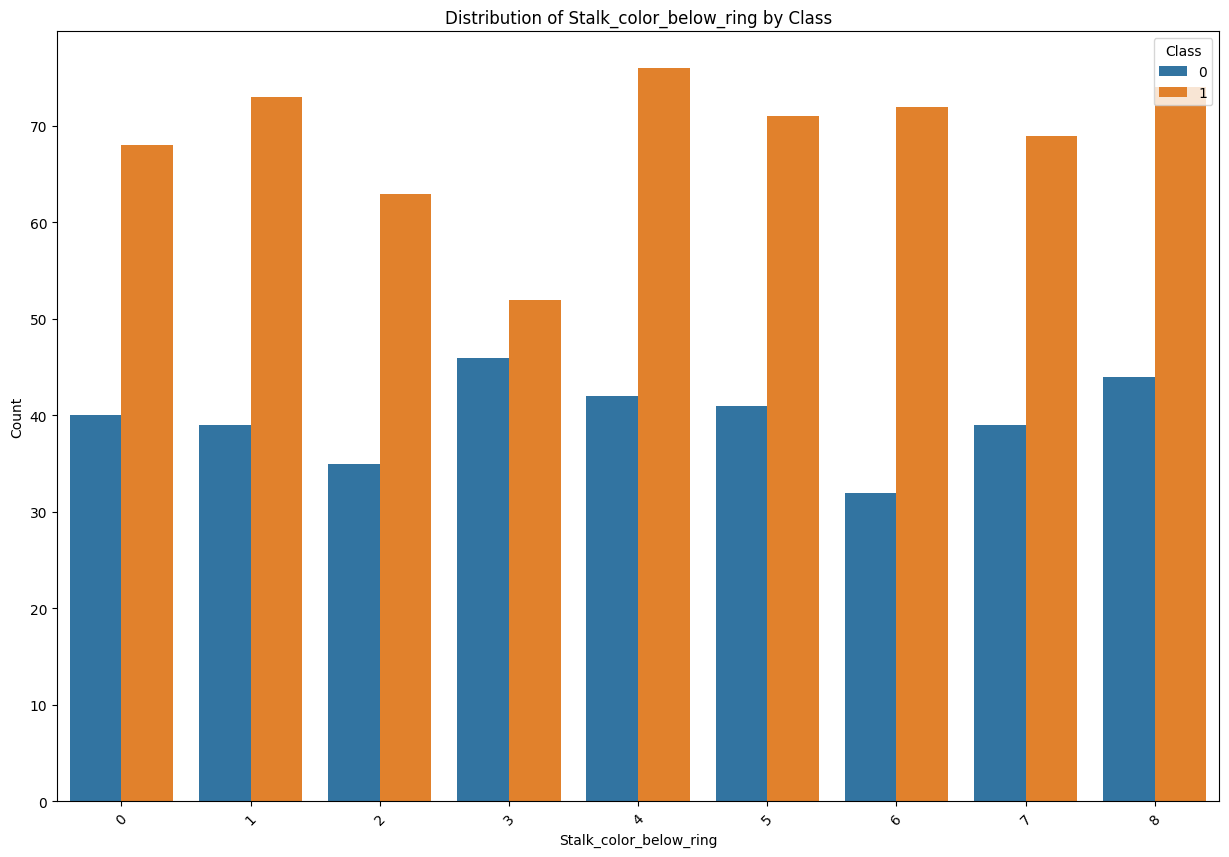

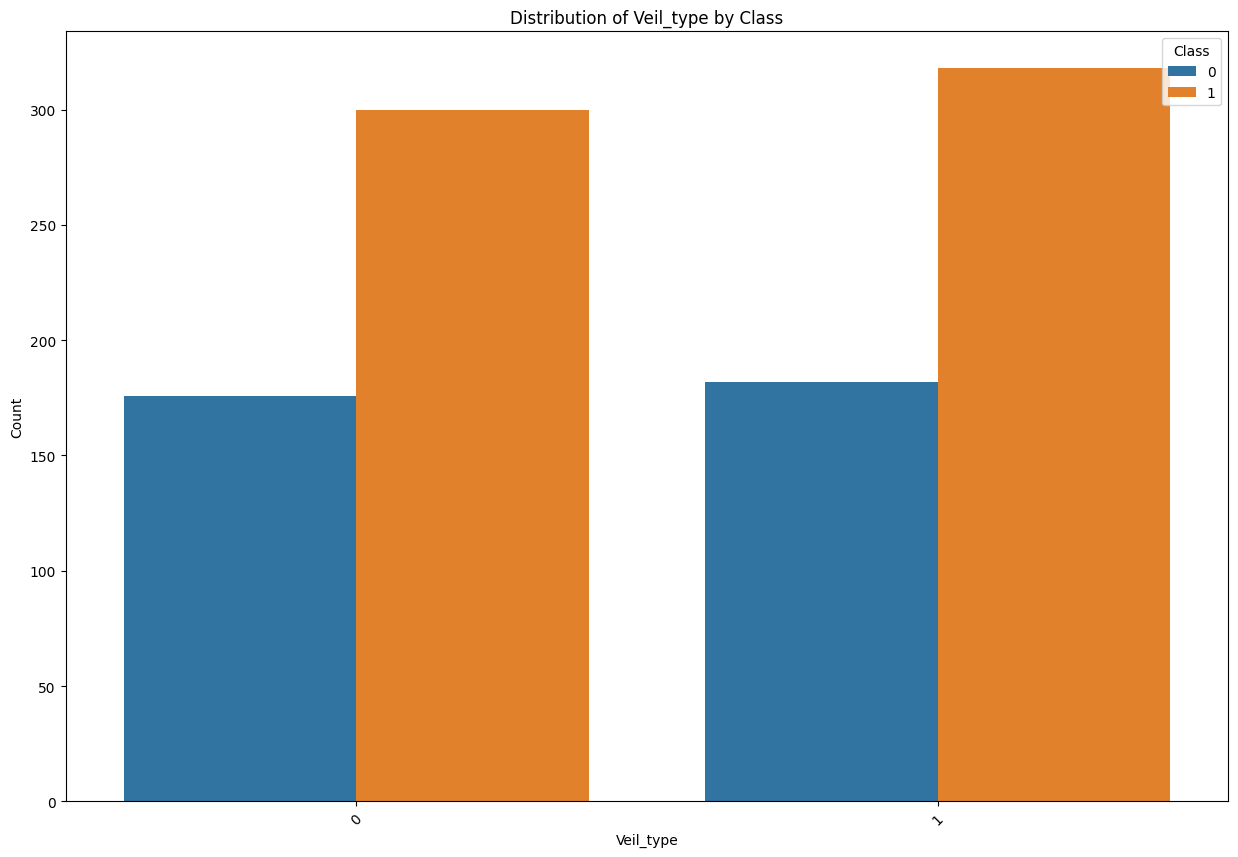

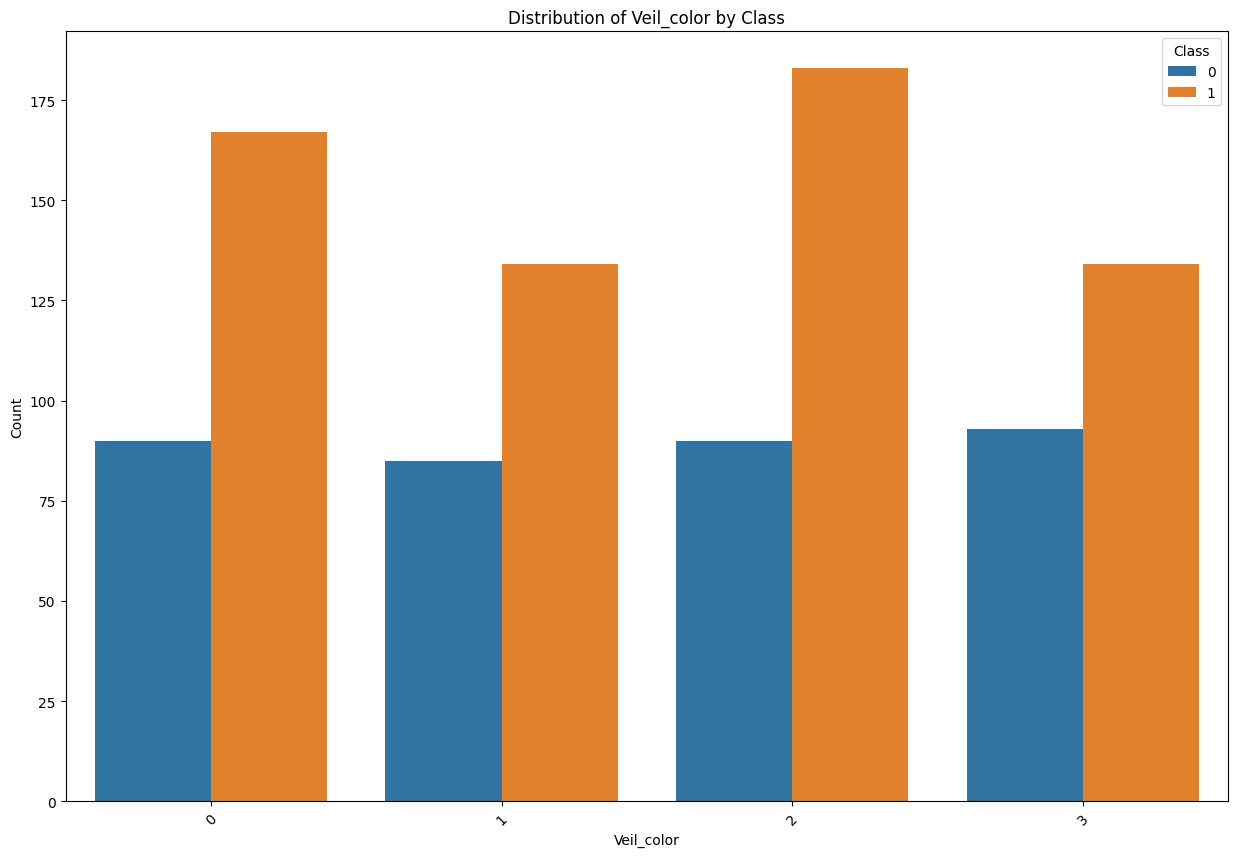

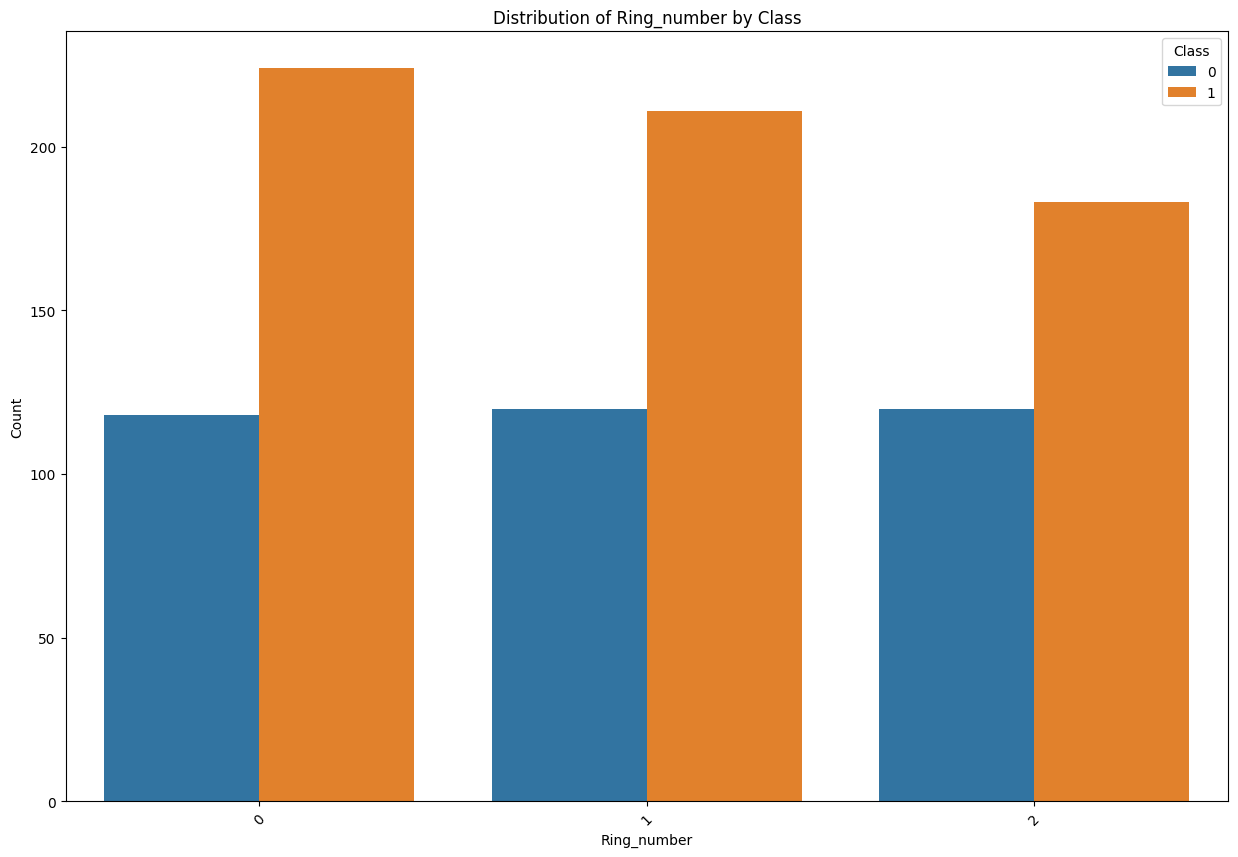

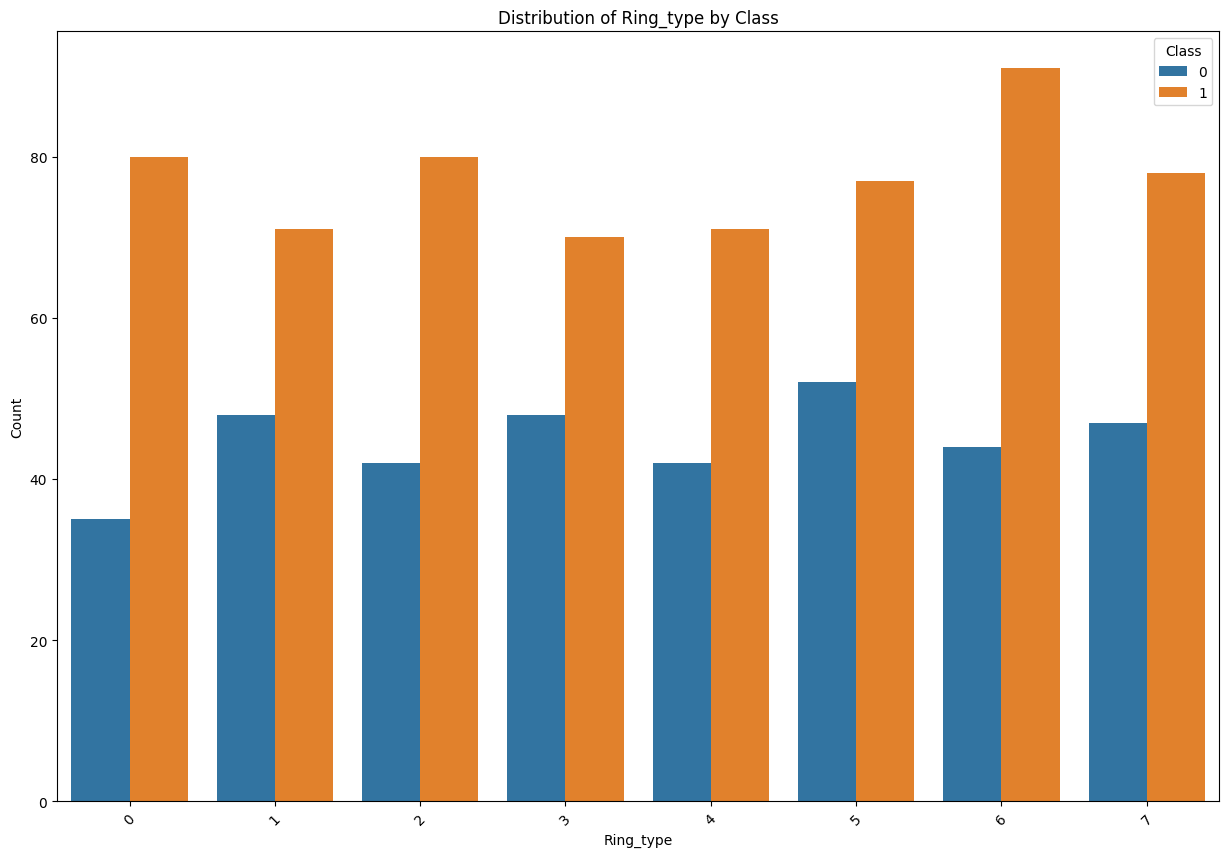

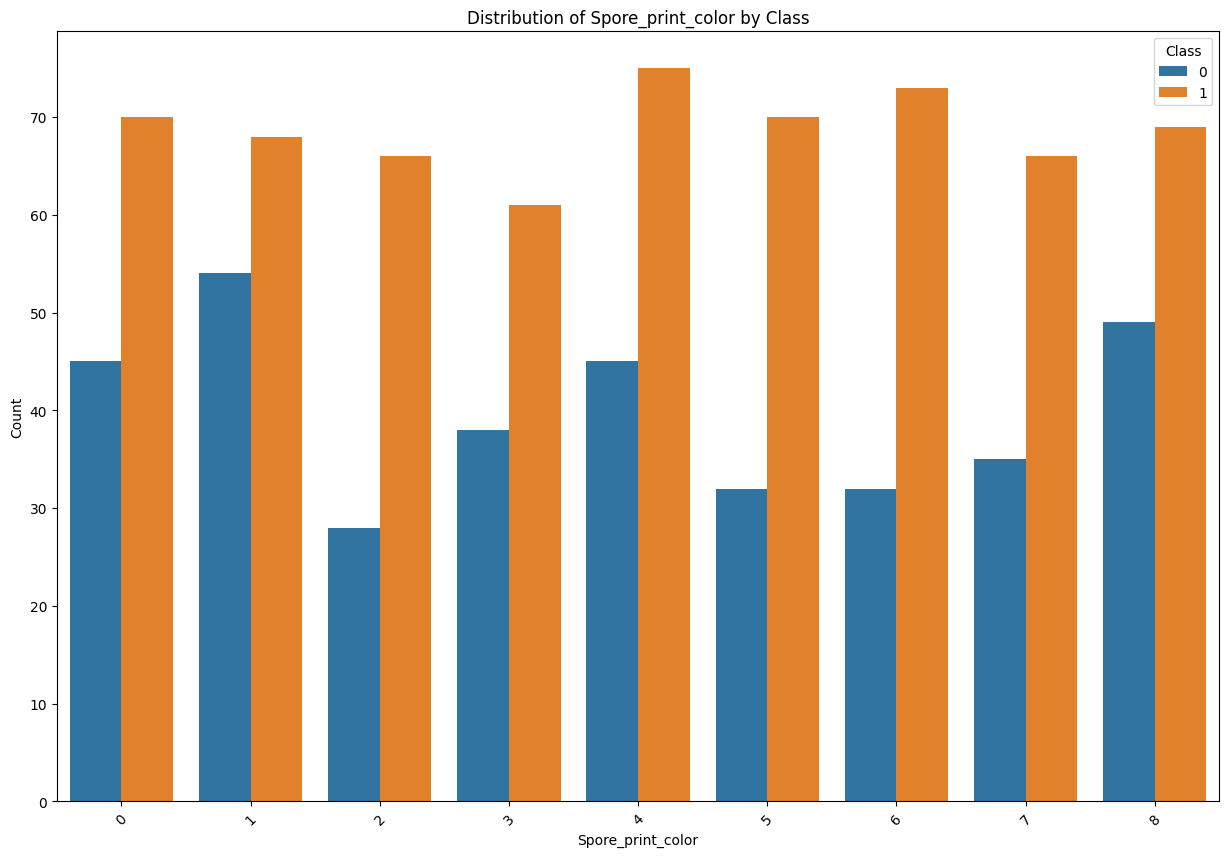

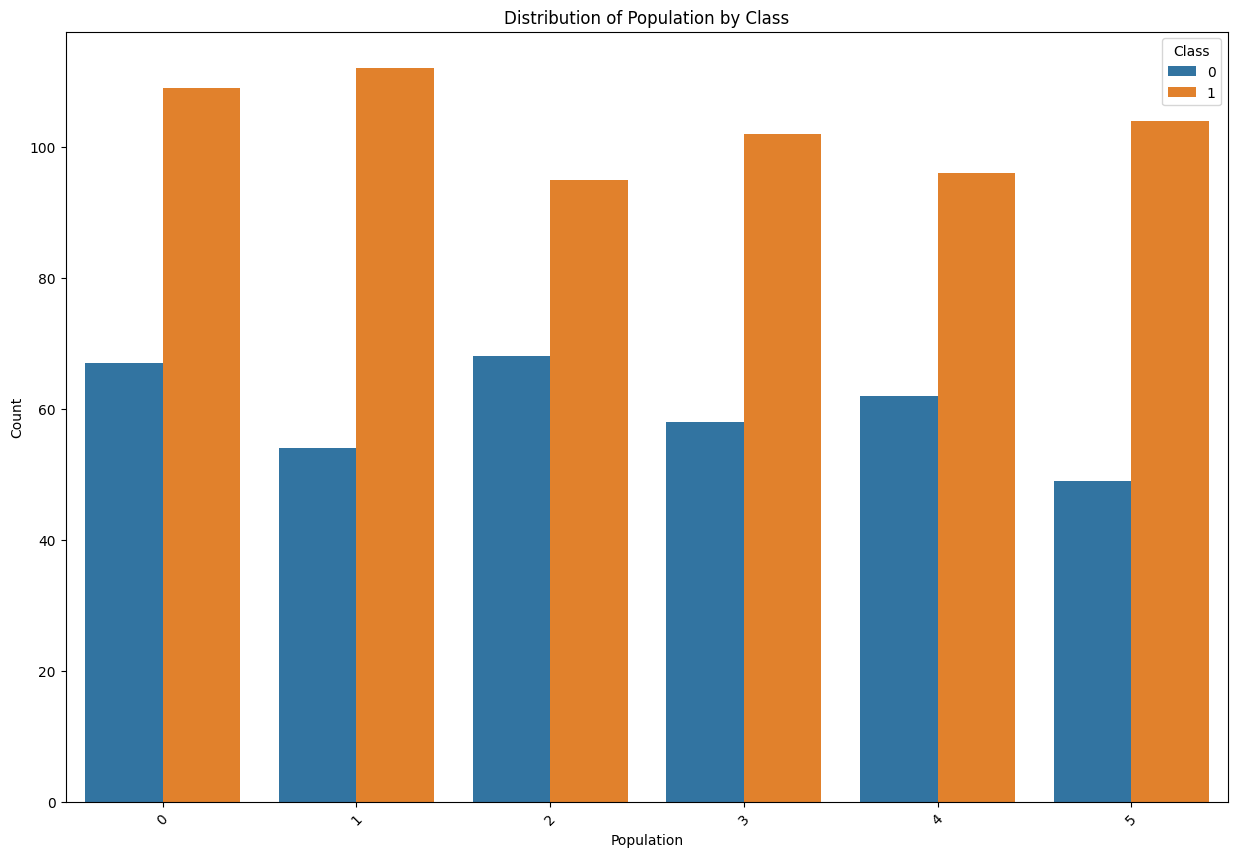

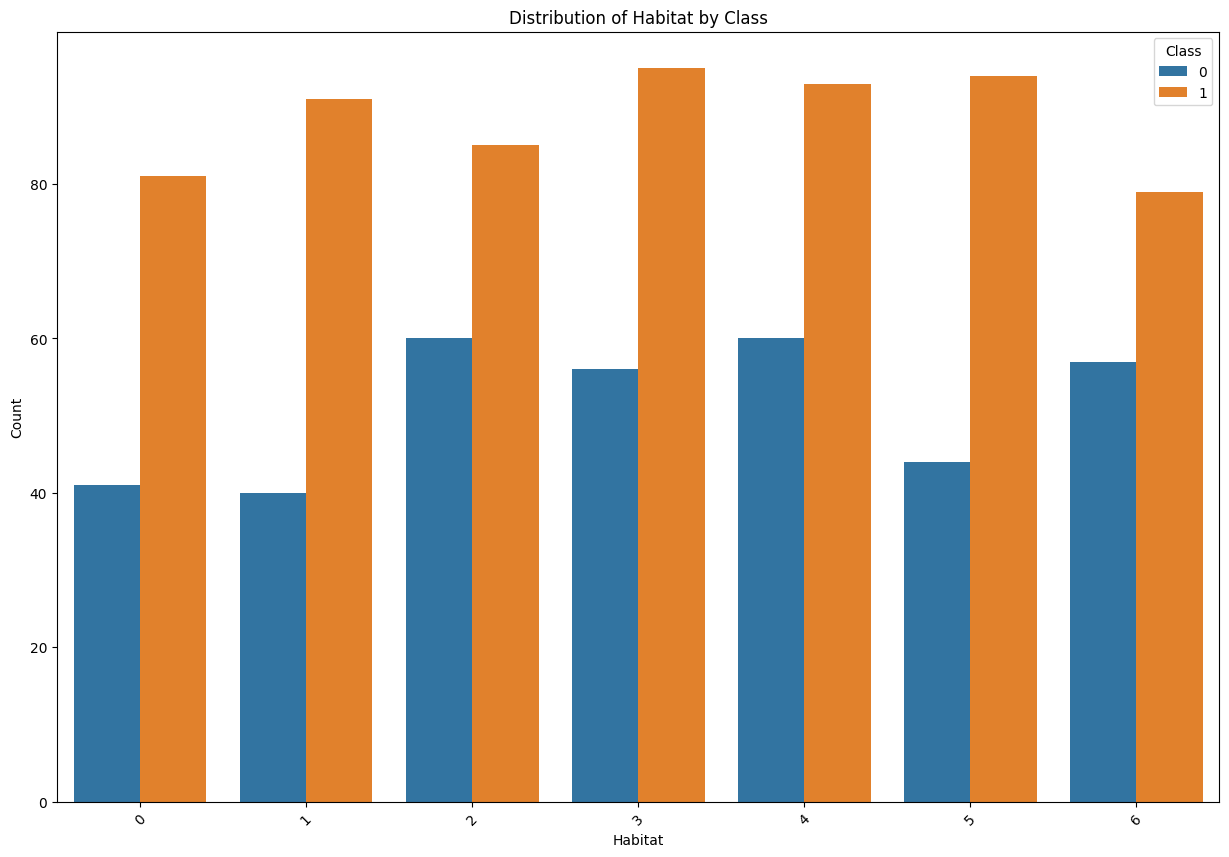

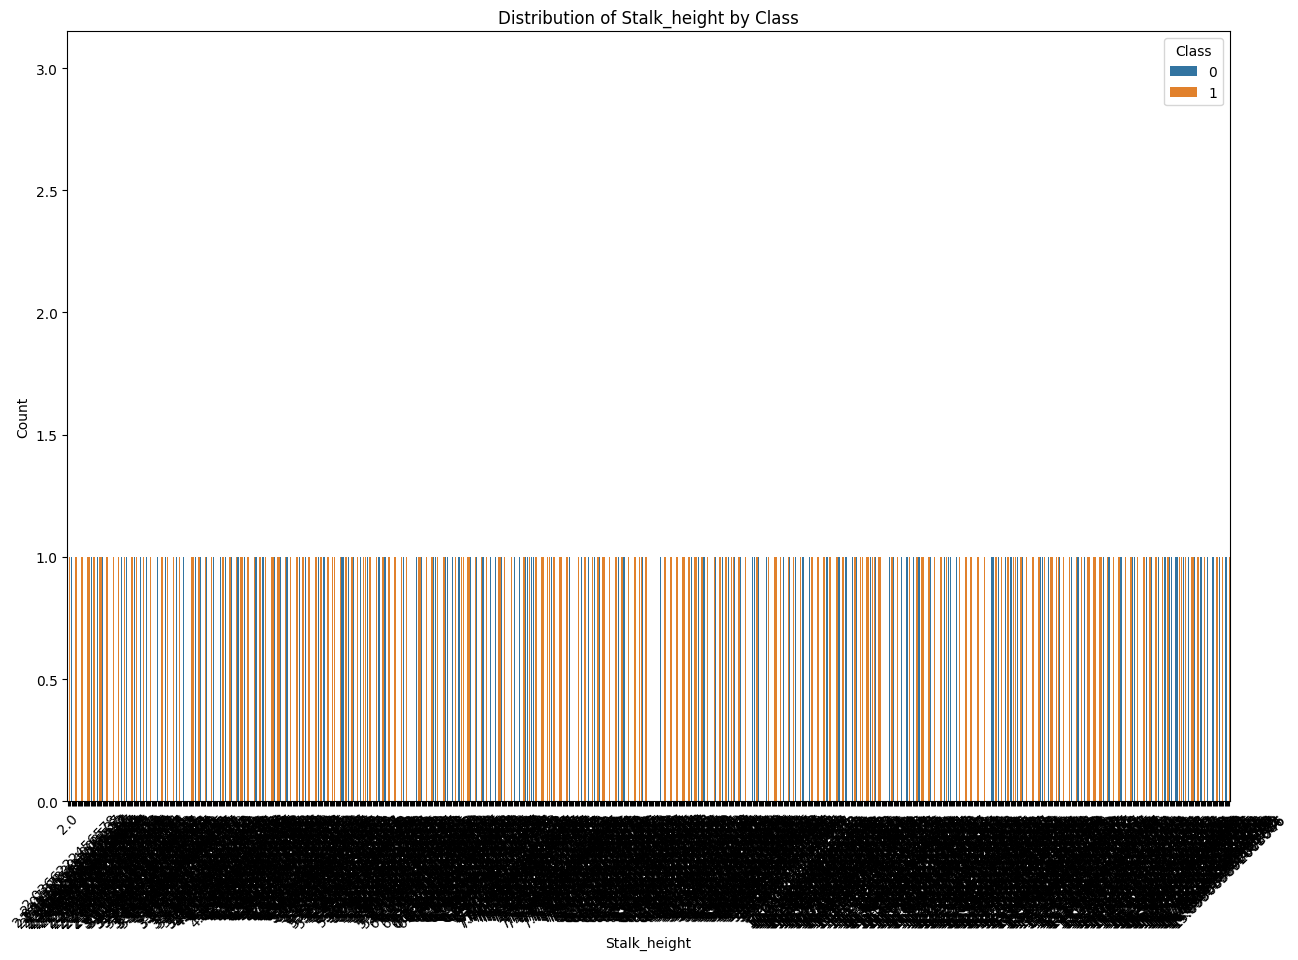

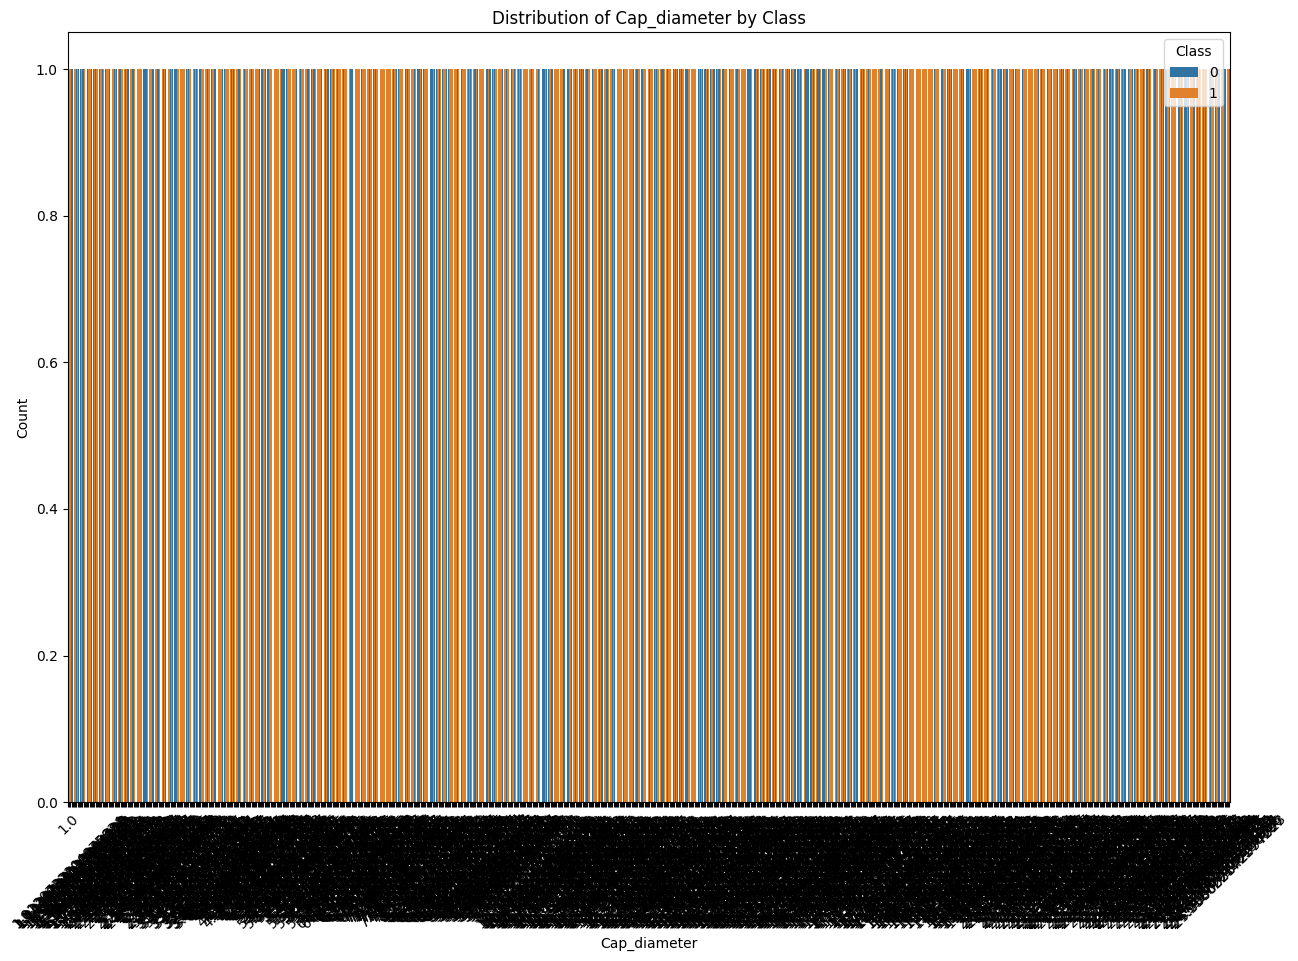

In [49]:
# Visualize distribution of individual features
features = df.drop(columns=['class'])  # Exclude the target variable
for feature in features.columns:
    plt.figure(figsize=(15,10))
    sns.countplot(data=df, x=feature, hue='class')
    plt.title(f'Distribution of {feature.capitalize()} by Class')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Class', loc='upper right')
    plt.show()

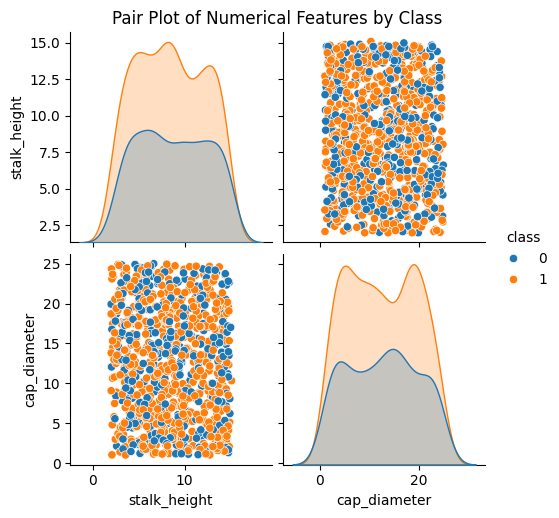

In [50]:
# Pair plot for numerical features with target variable
numerical_features = ['stalk_height', 'cap_diameter']
sns.pairplot(df[numerical_features + ['class']], hue='class')
plt.suptitle('Pair Plot of Numerical Features by Class', y=1.02)
plt.show()

2.Analysis of SVM Strengths and Weaknesses for the Mushroom Dataset

**Strengths:**

1. **Non-linearity Handling:**  
   SVM effectively captures non-linear decision boundaries using appropriate kernels (e.g., polynomial, RBF), making it suitable for complex datasets like the Mushroom dataset.

2. **Robustness to Overfitting:**  
   The regularization parameter **C** helps control overfitting, enabling better generalization, especially in high-dimensional datasets like the Mushroom dataset.

3. **Effective in High-dimensional Spaces:**  
   SVM performs well even with many features, beneficial for datasets with numerous characteristics.

4. **Kernel Flexibility:**  
   SVM allows for various kernel functions, enabling the model to adapt to different data distributions and capture complex patterns.

**Weaknesses:**

1. **Scalability:**  
   Training time can be slow with large datasets, particularly when using non-linear kernels, which may hinder real-time predictions.

2. **Sensitivity to Hyperparameters:**  
   Performance is sensitive to hyperparameters (e.g., kernel choice, **C**, **gamma**), making the tuning process time-consuming and computationally intensive.

3. **Interpretability:**  
   SVM models, especially with non-linear kernels, are often viewed as black boxes, complicating the understanding of feature impacts on predictions.

4. **Imbalanced Data Handling:**  
   SVM may struggle with imbalanced datasets, like the Mushroom dataset, despite techniques like class weighting or resampling to mitigate the issue.

### Practical Implications of SVM in Real-World Classification Tasks

1. **High-Dimensional Data:**  
   SVM excels in high-dimensional spaces, making it suitable for fields like genomics, bioinformatics, and image recognition.

2. **Nonlinear Data:**  
   SVM effectively classifies nonlinear data using various kernel functions, applicable in tasks such as image classification and sentiment analysis.

3. **Binary and Multiclass Classification:**  
   SVM supports both binary and multiclass classification using techniques like one-vs-one or one-vs-all, making it versatile across classification problems.

4. **Robustness to Overfitting:**  
   SVM is less prone to overfitting, particularly in high-dimensional spaces, making it effective for small to medium-sized datasets.

5. **Regularization Parameter (C):**  
   The flexibility of **C** allows for fine-tuning the model based on specific classification task requirements.

6. **Outlier Robustness:**  
   SVM is robust to outliers, focusing on maximizing the margin between classes, making it suitable for anomaly and fraud detection.

7. **Interpretability:**  
   SVM provides interpretable results through support vectors, aiding in understanding the model's decision-making process.

8. **Scalability:**  
   SVM can handle large datasets efficiently, particularly with linear kernels, enhanced by advancements in optimization and parallel computing.

### Summary
SVMs are powerful and versatile classifiers that effectively handle high-dimensional, nonlinear data while maintaining robustness against overfitting and outliers. Their flexibility and interpretability make them valuable tools in various real-world classification tasks. However, careful consideration of dataset characteristics and hyperparameter tuning is essential for optimizing SVM performance.

In [51]:
counts.index

Index(['poisonous', 'edible'], dtype='object', name='class')

In [52]:
counts_df

,Value,Count
0,poisonous,618
1,edible,358


### Discuss practical implications of SVM in real-world classification tasks.

Practical Implications of Support Vector Machines (SVM) in Real-World Classification Tasks

1. **High-Dimensional Data Handling:**
   - **Application:** SVMs excel in scenarios with numerous features, such as genomics, image recognition, and text categorization. Their ability to operate effectively in high-dimensional spaces makes them particularly valuable in these fields, where datasets can contain thousands of variables.
   - **Benefit:** SVMs maintain performance and accuracy even as the dimensionality of the data increases, which is critical in fields where feature selection is complex.

2. **Nonlinear Decision Boundaries:**
   - **Application:** Using various kernel functions (e.g., RBF, polynomial), SVMs can effectively classify nonlinear data, making them suitable for tasks like sentiment analysis, financial forecasting, and object recognition in images.
   - **Benefit:** This flexibility allows SVMs to adapt to different data distributions, capturing complex relationships that linear models cannot.

3. **Binary and Multiclass Classification:**
   - **Application:** SVMs are primarily designed for binary classification but can be extended to multiclass problems through techniques like one-vs-one or one-vs-all strategies. This versatility makes them applicable across a wide range of classification tasks, from medical diagnosis to spam detection.
   - **Benefit:** Their ability to handle multiple classes broadens the scope of problems they can solve, enhancing their utility in various domains.

4. **Robustness to Overfitting:**
   - **Application:** SVMs are less prone to overfitting, especially in high-dimensional datasets. This characteristic is particularly advantageous in scenarios with limited data, such as medical or scientific research, where overfitting can lead to misleading conclusions.
   - **Benefit:** By maintaining generalization capabilities, SVMs provide reliable predictions even when training data is scarce.

5. **Regularization and Model Tuning:**
   - **Application:** The regularization parameter **C** allows users to control the trade-off between maximizing the margin and minimizing classification error. Users can fine-tune SVM models to suit specific classification tasks, adjusting sensitivity to misclassification.
   - **Benefit:** This flexibility helps in tailoring models to the unique characteristics of different datasets, improving classification performance.

6. **Outlier Robustness:**
   - **Application:** SVMs focus on support vectors, making them inherently robust to outliers in training data. This property is beneficial in applications like fraud detection and anomaly detection, where outliers are common.
   - **Benefit:** The robustness against outliers ensures that the model remains effective and reliable, even in datasets with significant noise.

7. **Interpretability:**
   - **Application:** SVMs provide interpretable insights through support vectors, which are the critical data points that define the decision boundary. This interpretability is valuable in applications like credit scoring and healthcare, where understanding the model's decision-making process is crucial.
   - **Benefit:** Increased transparency allows stakeholders to trust and validate model predictions, essential in regulated industries.

8. **Scalability:**
   - **Application:** While traditional SVMs may struggle with very large datasets, advancements in algorithms (e.g., linear SVMs and stochastic gradient descent) have improved scalability, making them applicable in big data contexts.
   - **Benefit:** Enhanced scalability allows organizations to leverage SVMs on larger datasets, expanding their analytical capabilities.

### Conclusion
SVMs are a powerful tool in real-world classification tasks, providing flexibility, robustness, and interpretability across various domains. Their strengths in handling high-dimensional and nonlinear data, along with their resilience to overfitting and outliers, make them an attractive choice for many applications. However, practitioners should consider the specific characteristics of their datasets and perform appropriate hyperparameter tuning to maximize SVM performance.